# Lab 7- Data Analysis

In this lab, you download and begin to look at a particle physics dataset. You must download the dataset by March 17th. Exercises 1-4 are to be completed by March 21th. The remaider of the lab is due March 29th. Before leaving lab today, I suggest everyone downloads the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). 

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms. 

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY). 

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS: 
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [1]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz

--2025-03-22 13:09:09--  http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘SUSY.csv.gz’

SUSY.csv.gz             [            <=>     ] 879.65M  5.10MB/s    in 2m 23s  

2025-03-22 13:11:32 (6.14 MB/s) - ‘SUSY.csv.gz’ saved [922377711]



In [2]:
!gunzip SUSY.csv.gz

In [19]:
ls -lh

total 2.5G
-rwxrwxrwx 1 root root 387K Mar 22 12:06 Lab.7.ipynb*
-rwxrwxrwx 1 root root 5.9M Mar 18 21:45 Lab.7.pdf*
-rwxrwxrwx 1 root root 3.6M Apr  2 10:19 Lab.7_Solution.ipynb*
-rwxrwxrwx 1 root root 228M Mar 29 20:58 SUSY-small.csv*
-rwxrwxrwx 1 root root 2.3G Mar 22 13:11 SUSY.csv*


The data is provided as a comma separated file.

In [2]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

## Reducing the dataset

This is a rather large dataset. If you have trouble loading it, we can easily make a new file with less data.

Here we look at the size of the data

In [3]:
!ls -lh

total 2.3G
-rwxrwxrwx 1 prakriti04 prakriti04 387K Mar 22 12:06 Lab.7.ipynb
-rwxrwxrwx 1 prakriti04 prakriti04 5.9M Mar 18 21:45 Lab.7.pdf
-rwxrwxrwx 1 prakriti04 prakriti04 1.7M Mar 29 20:48 Lab.7_Solution.ipynb
-rwxrwxrwx 1 prakriti04 prakriti04 2.3G Mar 22 13:11 SUSY.csv


We see that we have 5 million datapoints.

In [4]:
!wc -l SUSY.csv

5000000 SUSY.csv


We create a new file of the first half million. This is sufficient for our needs in this lab:

In [5]:
!head -500000 SUSY.csv > SUSY-small.csv

In [13]:
ls -lh

total 2.5G
-rwxrwxrwx 1 prakriti04 prakriti04 387K Mar 21 23:25 Lab.7.ipynb*
-rwxrwxrwx 1 prakriti04 prakriti04 5.9M Mar 18 21:45 Lab.7.pdf*
-rwxrwxrwx 1 prakriti04 prakriti04 1.1M Mar 22 11:47 Lab.7_Solution.ipynb*
-rwxrwxrwx 1 prakriti04 prakriti04 228M Mar 22 11:48 SUSY-small.csv*
-rwxrwxrwx 1 prakriti04 prakriti04 2.3G Mar 22 10:08 SUSY.csv*


In [6]:
! wc -l SUSY-small.csv

500000 SUSY-small.csv


Use this file for the rest of the lab to make this run faster.

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [41]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [42]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [43]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [44]:
FeatureNames

['M_R',
 'dPhi_r_b',
 'M_TR_2',
 'M_Delta_R',
 'axial_MET',
 'MET_rel',
 'MT2',
 'S_R',
 'cos_theta_r1',
 'R']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [46]:
filename = "SUSY-small.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [47]:
df

signal    l_1_pT   l_1_eta   l_1_phi    l_2_pT   l_2_eta   l_2_phi  \
0          0.0  0.972861  0.653855  1.176225  1.157156 -1.739873 -0.874309   
1          1.0  1.667973  0.064191 -1.225171  0.506102 -0.338939  1.672543   
2          1.0  0.444840 -0.134298 -0.709972  0.451719 -1.613871 -0.768661   
3          1.0  0.381256 -0.976145  0.693152  0.448959  0.891753 -0.677328   
4          1.0  1.309996 -0.690089 -0.676259  1.589283 -0.693326  0.622907   
...        ...       ...       ...       ...       ...       ...       ...   
499995     0.0  0.719035  1.091879  0.291540  1.205962 -1.599117 -1.139445   
499996     1.0  0.910016 -0.364544 -0.777120  0.543648 -0.910632 -1.723707   
499997     1.0  0.842954  0.332476 -1.048564  1.347989  0.320496 -0.666358   
499998     0.0  1.370760 -1.162912  0.893499  2.118091  1.248496 -0.887211   
499999     0.0  0.762400  0.440924  0.342885  1.034283  1.740353 -1.083314   

             MET   MET_phi   MET_rel  axial_MET       M_R    M_TR_2         R  \
0       0.567765 -0.175000  0.810061  -0.252552  1.921887  0.889637  0.410772   
1       3.475464 -1.219136  0.012955   3.775174  1.045977  0.568051  0.481928   
2       1.219918  0.504026  1.831248  -0.431385  0.526283  0.941514  1.587535   
3       2.033060  1.533041  3.046260  -1.005285  0.569386  1.015211  1.582217   
4       1.087562 -0.381742  0.589204   1.365479  1.179295  0.968218  0.728563   
...          ...       ...       ...        ...       ...       ...       ...   
499995  0.424546  1.154849  0.637185  -0.091178  1.972156  0.697028  0.313636   
499996  2.864673  1.458272  2.176558  -0.590911  0.673695  1.662140  2.189362   
499997  0.450433 -0.411872  0.293407   0.630491  0.859920  0.403371  0.416258   
499998  0.164659  0.316840  0.215165   0.280418  3.087083  0.526929  0.151467   
499999  0.872145 -1.519894  0.284328  -0.360861  0.956828  0.965979  0.895881   

             MT2       S_R  M_Delta_R  dPhi_r_b  cos_theta_r1  
0       1.145621  1.932632   0.994464  1.367815      0.040714  
1       0.000000  0.448410   0.205356  1.321893      0.377584  
2       2.024308  0.603498   1.562374  1.135454      0.180910  
3       1.551914  0.761215   1.715464  1.492257      0.090719  
4       0.000000  1.083158   0.043429  1.154854      0.094859  
...          ...       ...        ...       ...           ...  
499995  0.988602  1.981573   0.744828  1.095080      0.006546  
499996  1.195041  0.910815   1.181893  1.252362      0.826035  
499997  0.591989  0.372003   0.716788  0.366991      0.265798  
499998  0.308067  3.098183   0.233042  0.876216      0.000593  
499999  1.020396  0.996446   0.943458  1.299870      0.197220  

[500000 rows x 19 columns]

The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [48]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


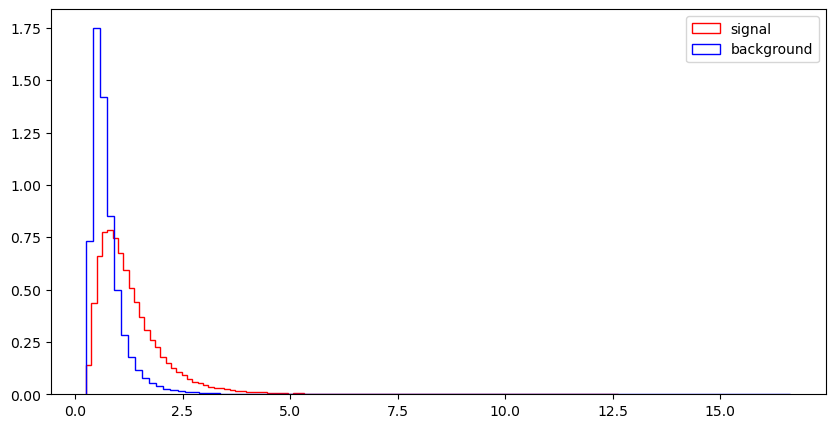

l_1_eta


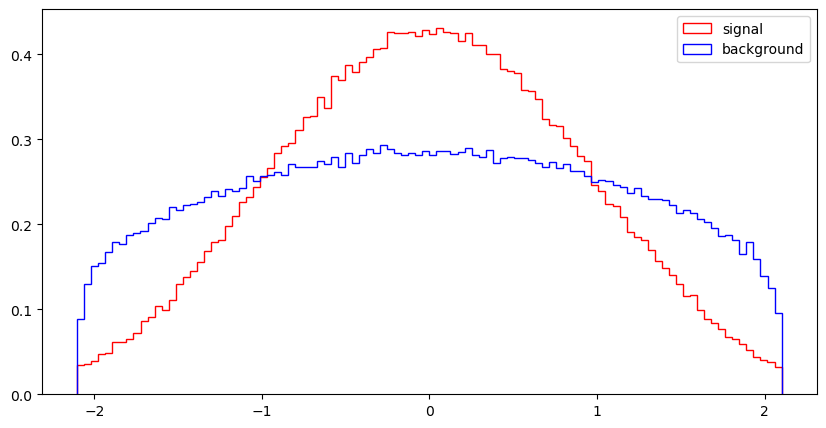

l_1_phi


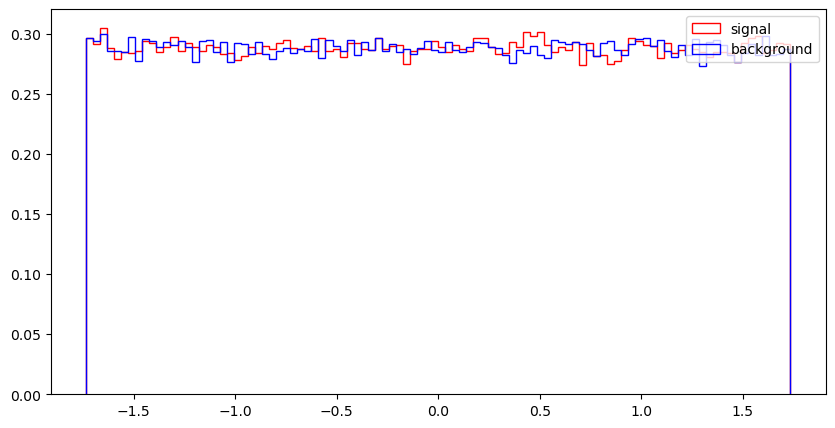

l_2_pT


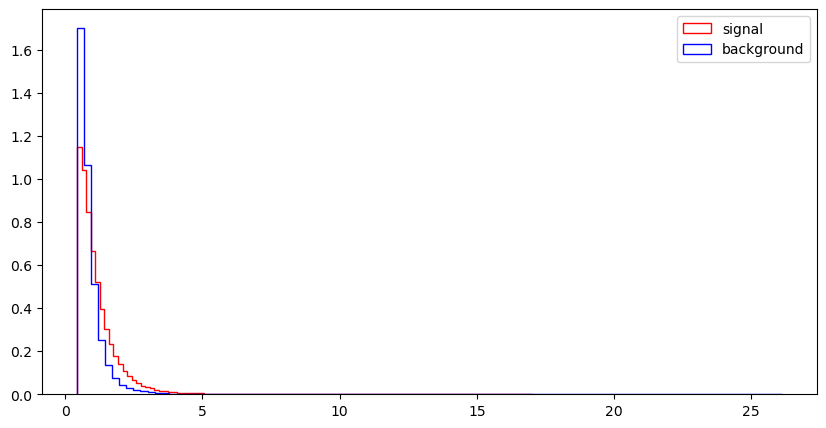

l_2_eta


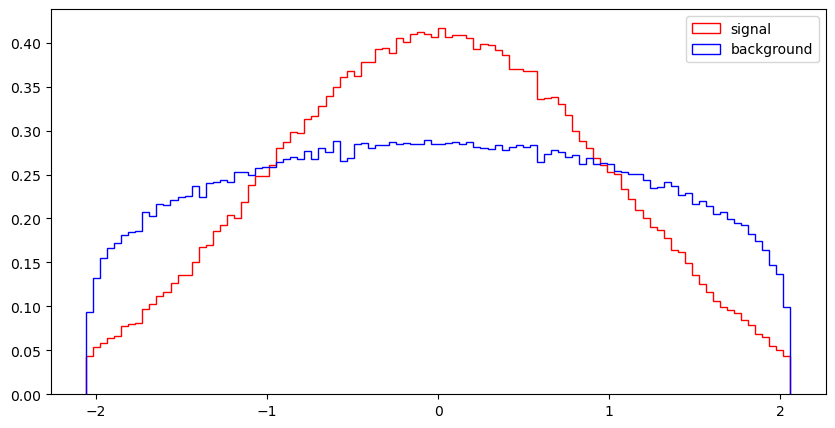

l_2_phi


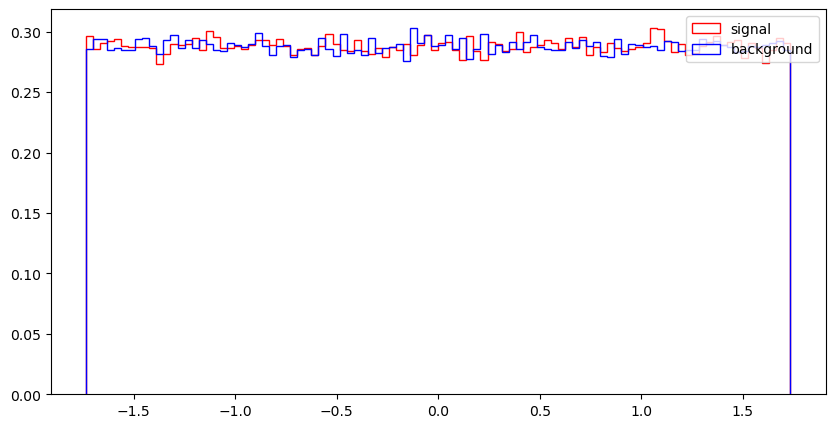

MET


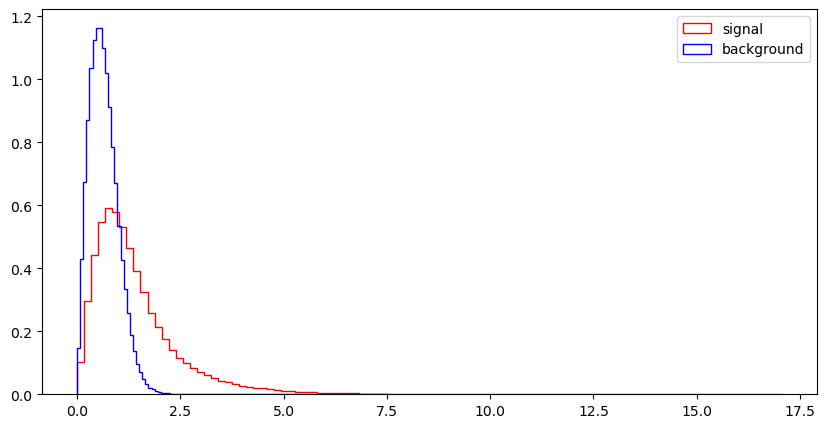

MET_phi


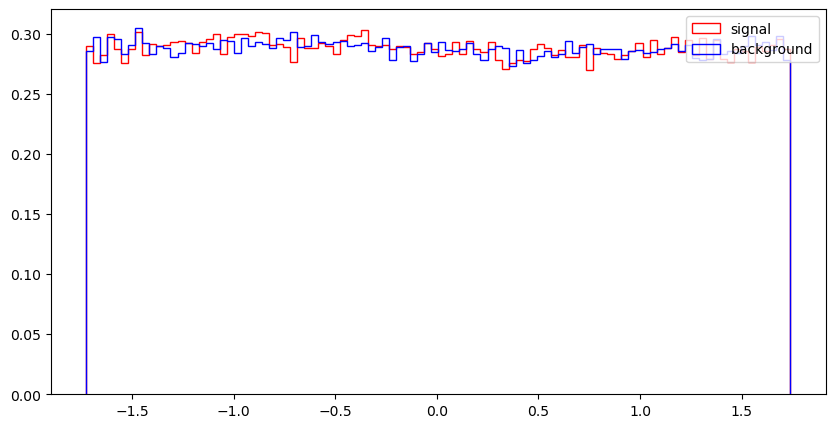

MET_rel


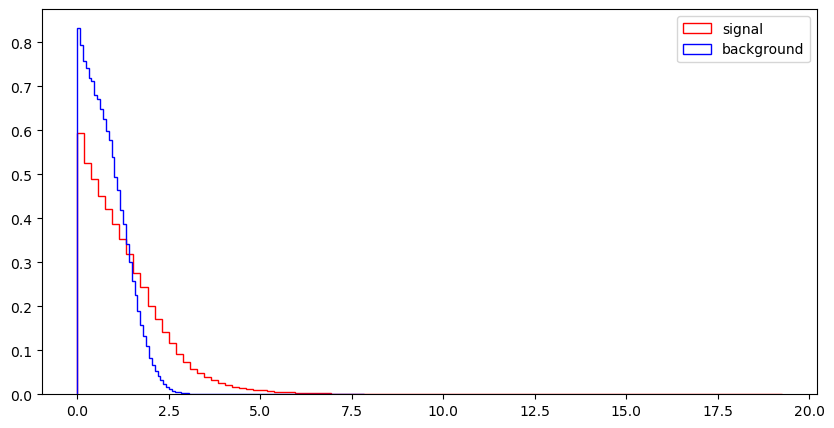

axial_MET


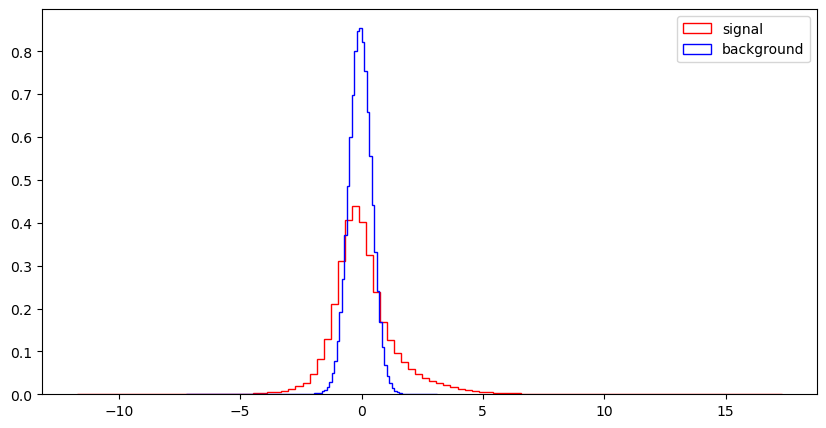

M_R


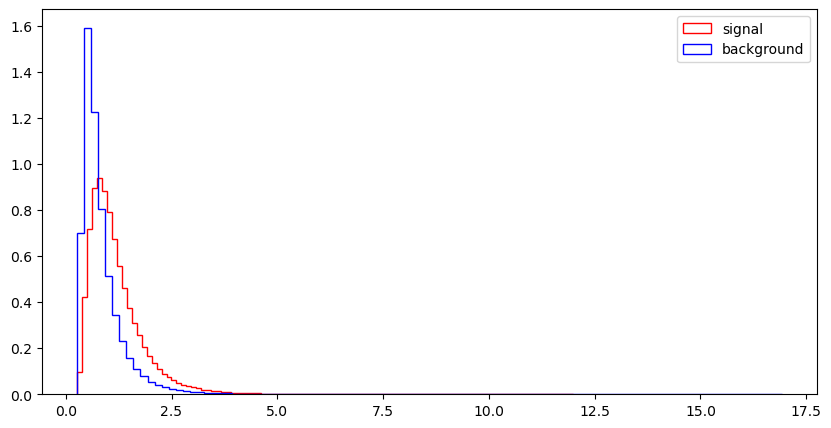

M_TR_2


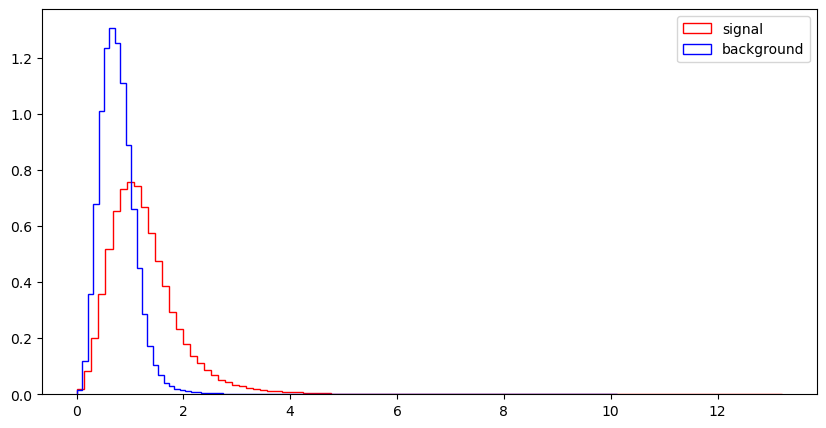

R


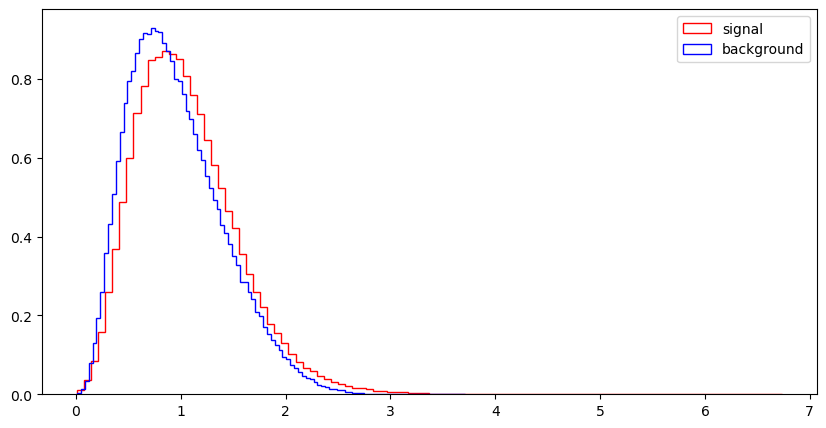

MT2


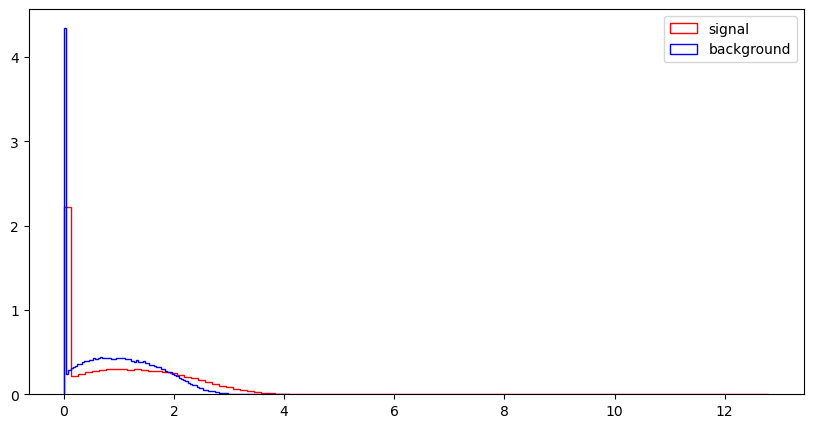

S_R


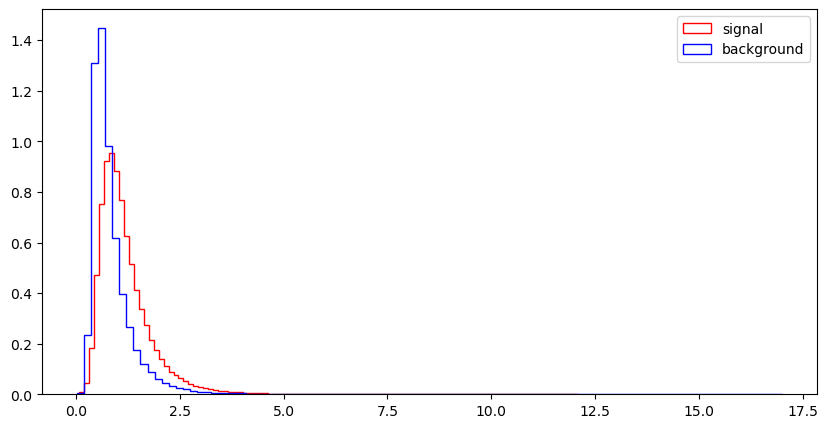

M_Delta_R


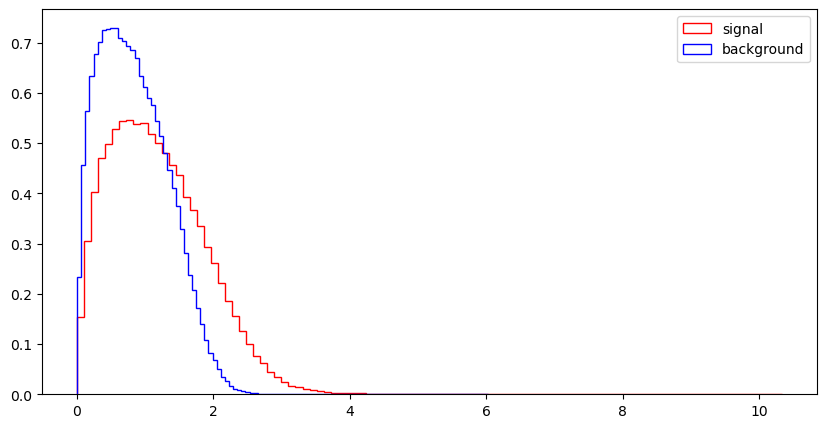

dPhi_r_b


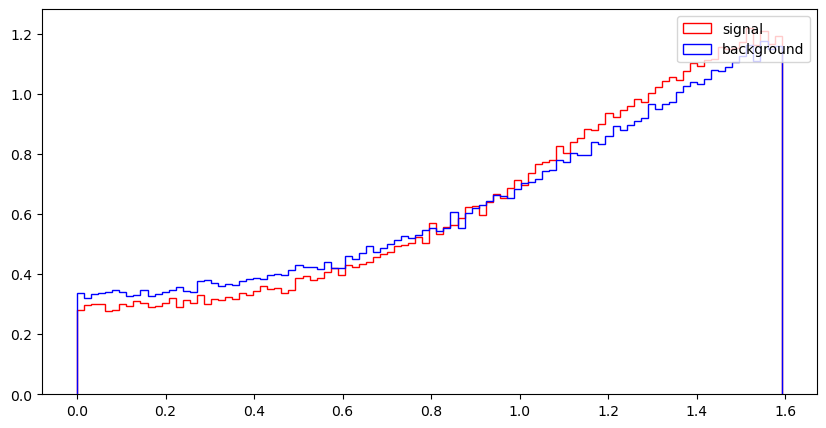

cos_theta_r1


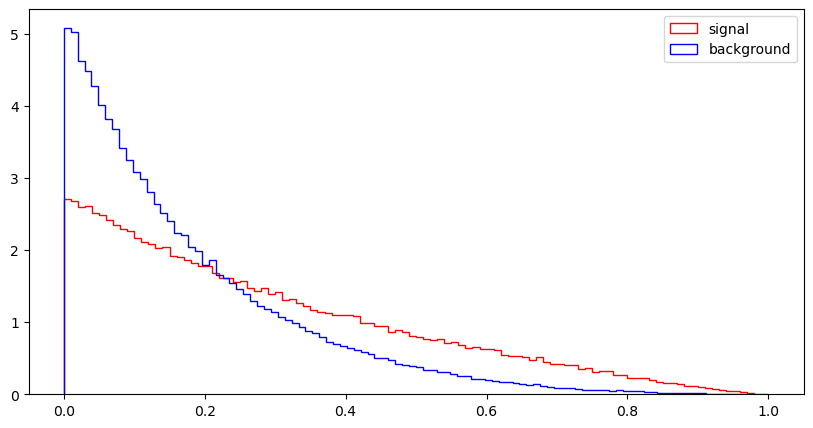

In [10]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

In [9]:
print(df.columns)

Index(['signal', 'l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta',
       'l_2_phi', 'MET', 'MET_phi', 'MET_rel', 'axial_MET', 'M_R', 'M_TR_2',
       'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos_theta_r1'],
      dtype='object')


In [14]:
low_level_features = VarNames[1:9]
high_level_features = VarNames[9:]
signal = df[df['signal'] == 1]
background = df[df['signal'] == 0]

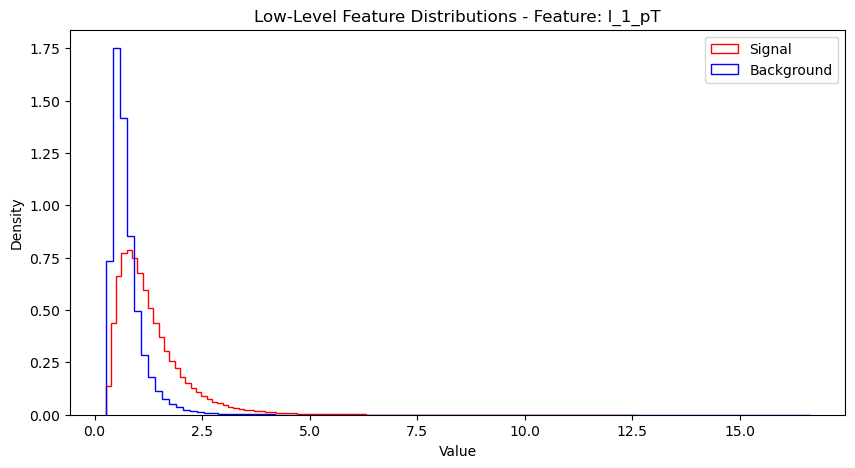

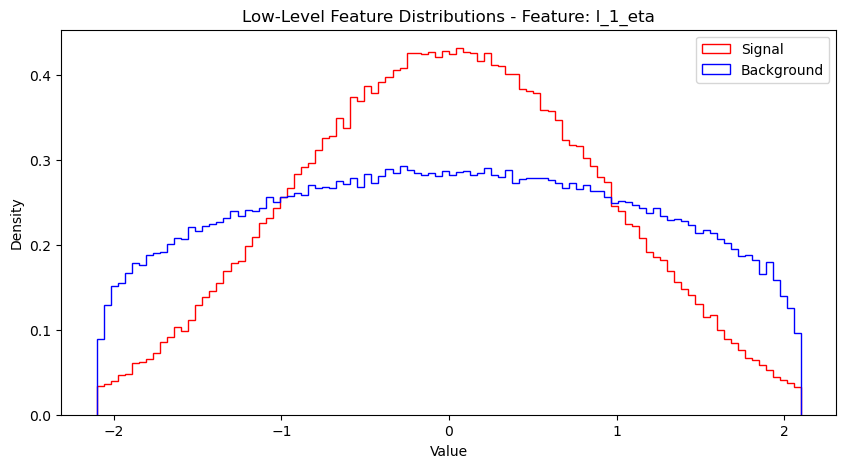

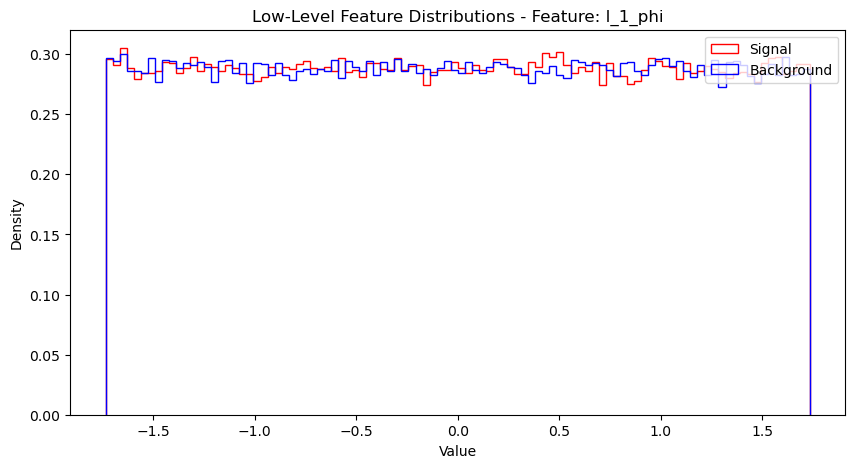

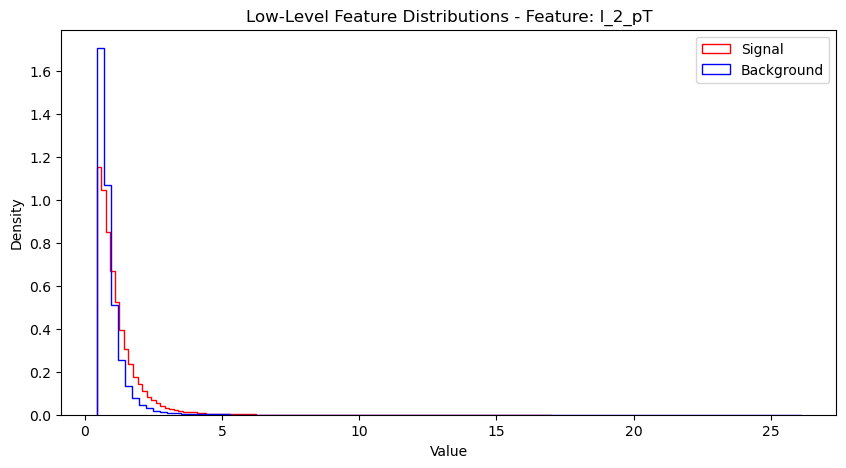

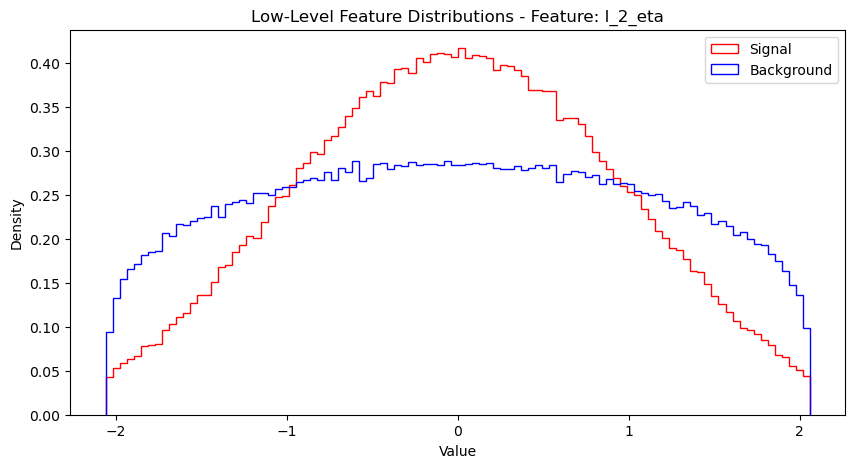

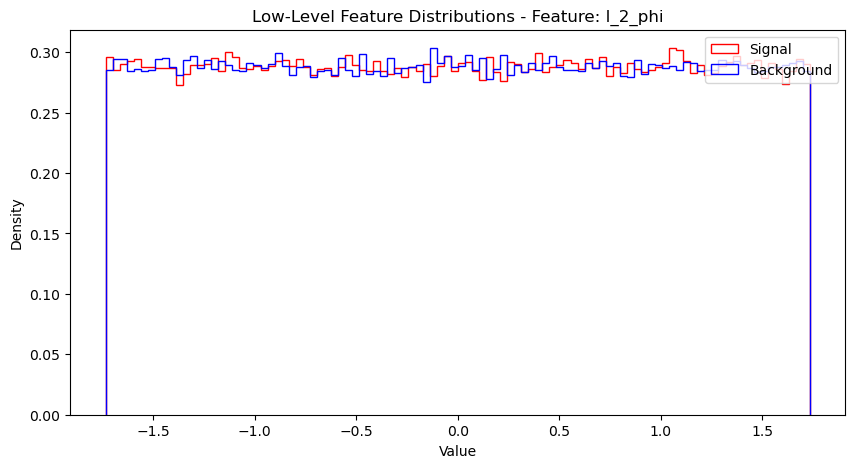

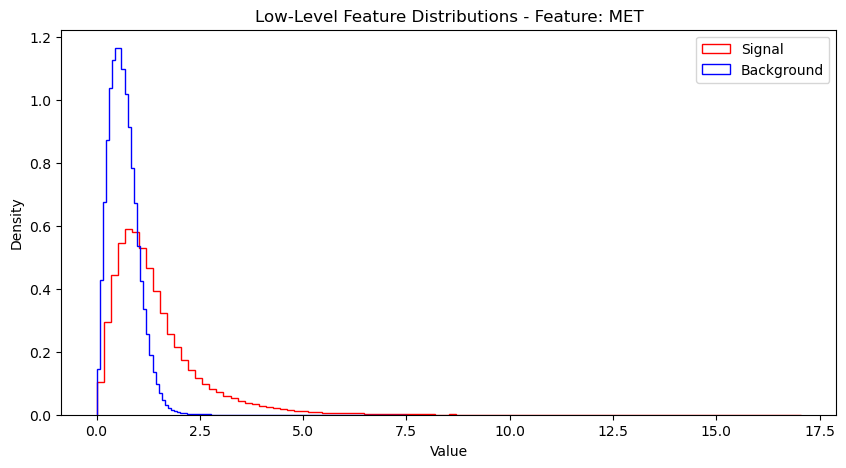

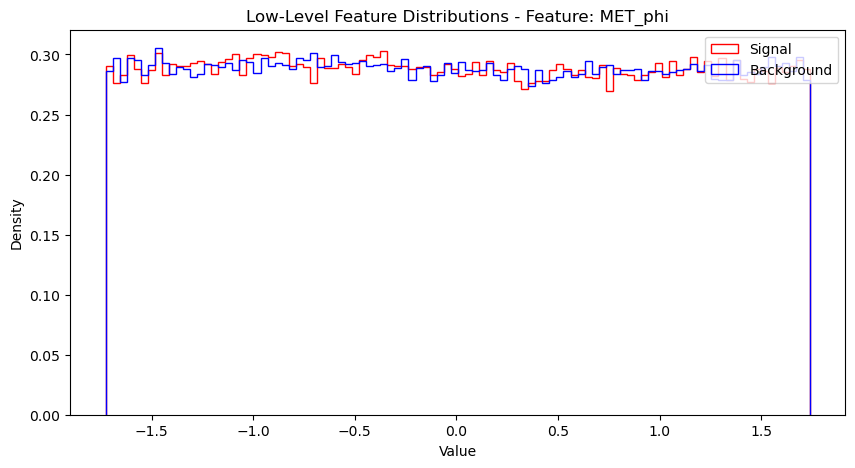

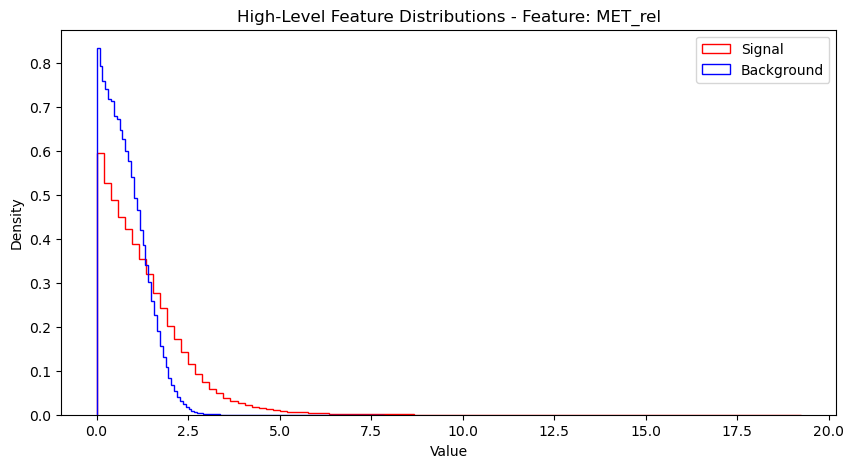

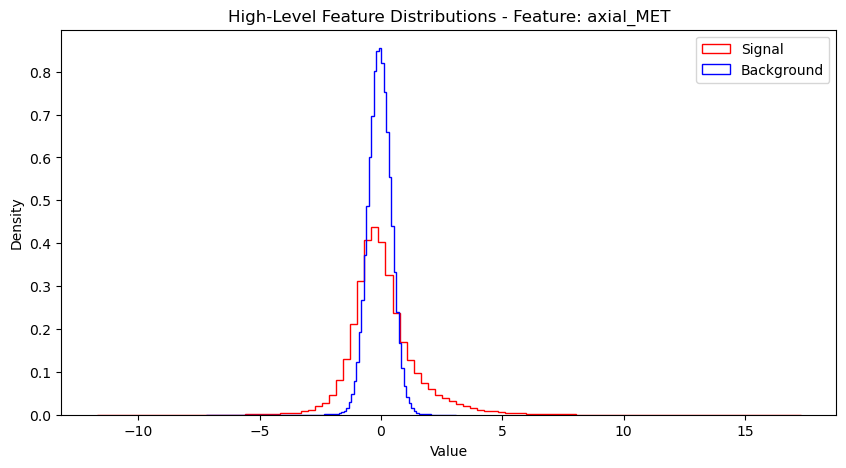

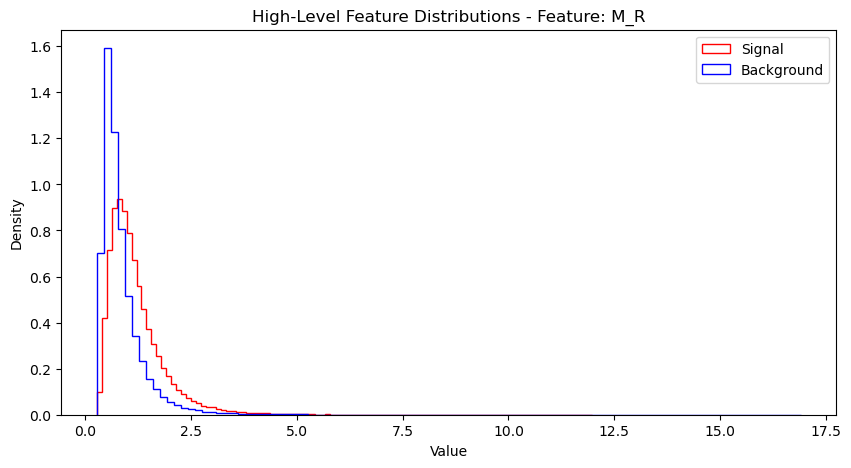

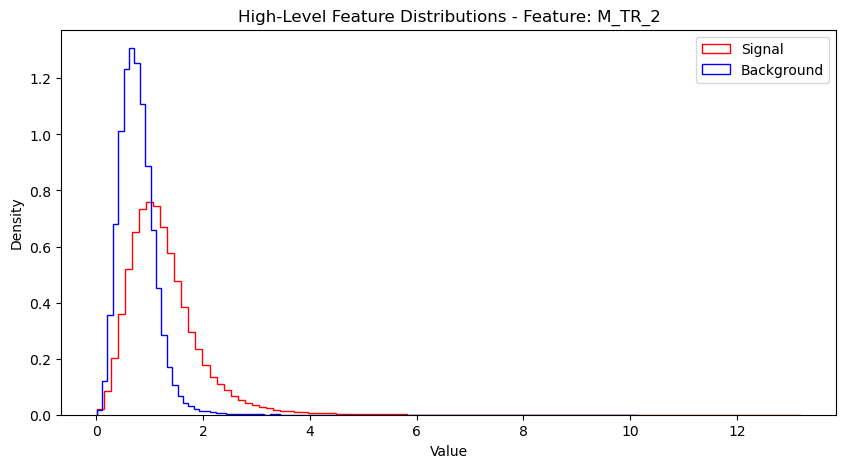

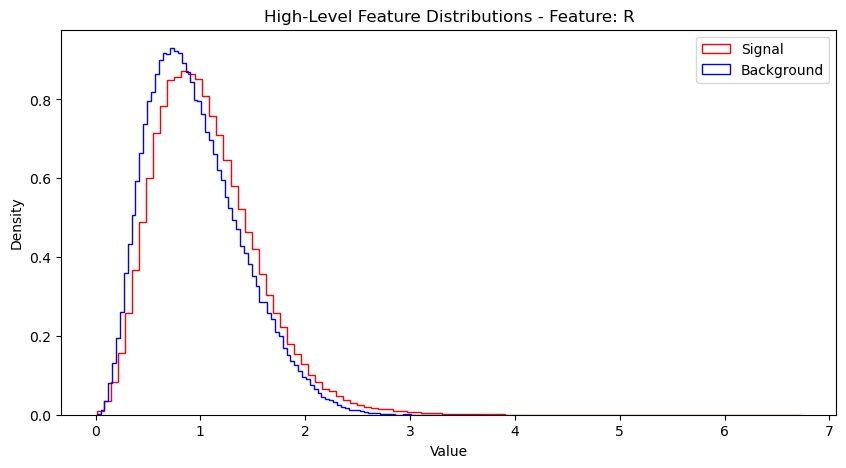

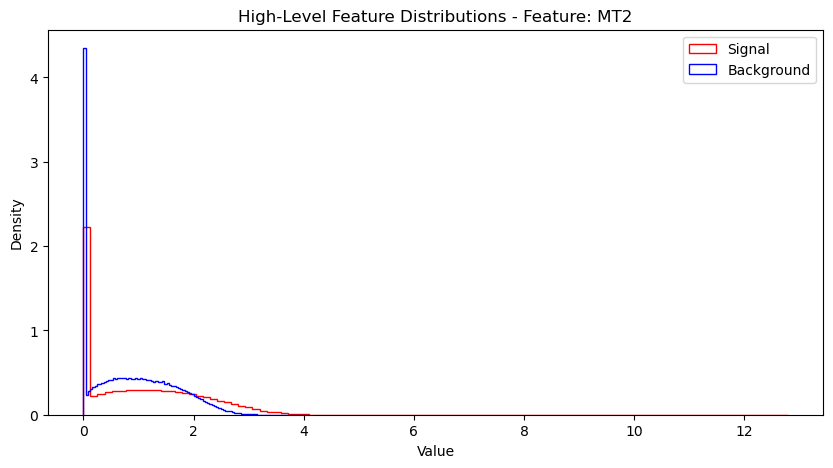

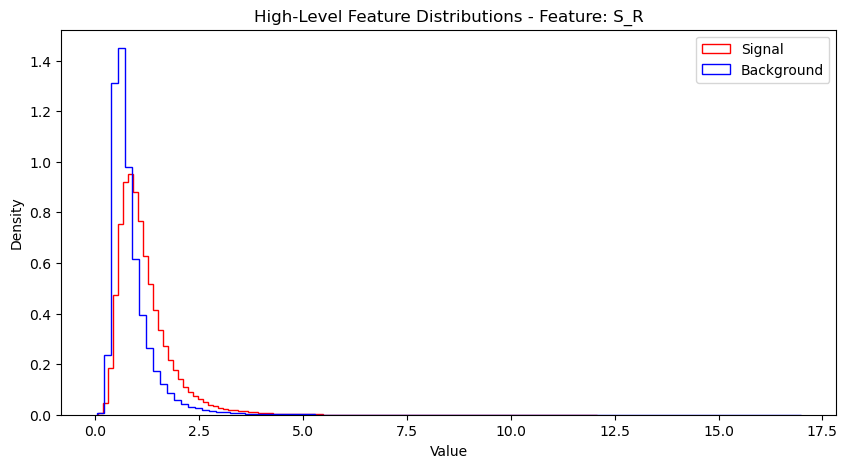

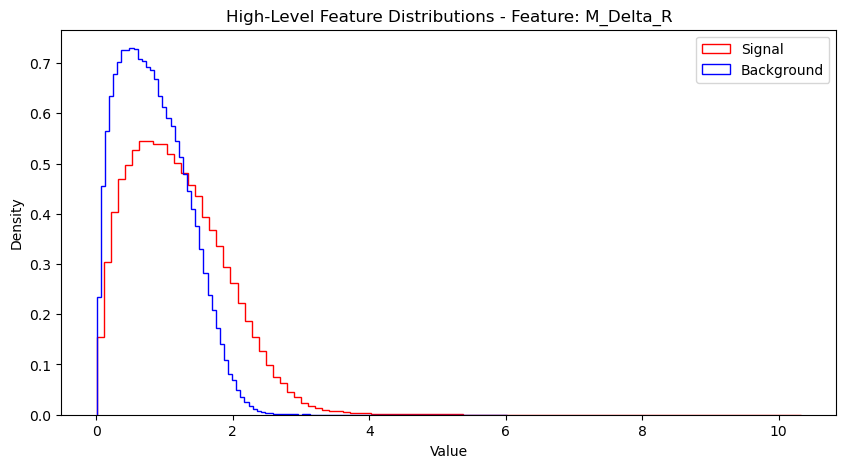

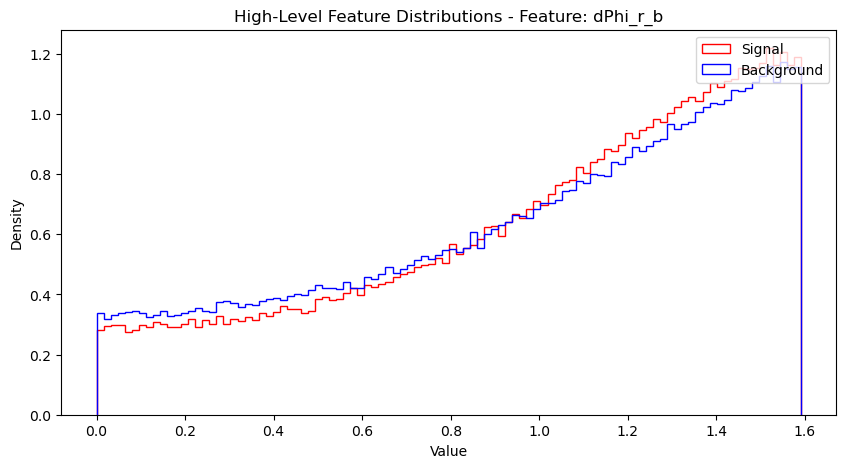

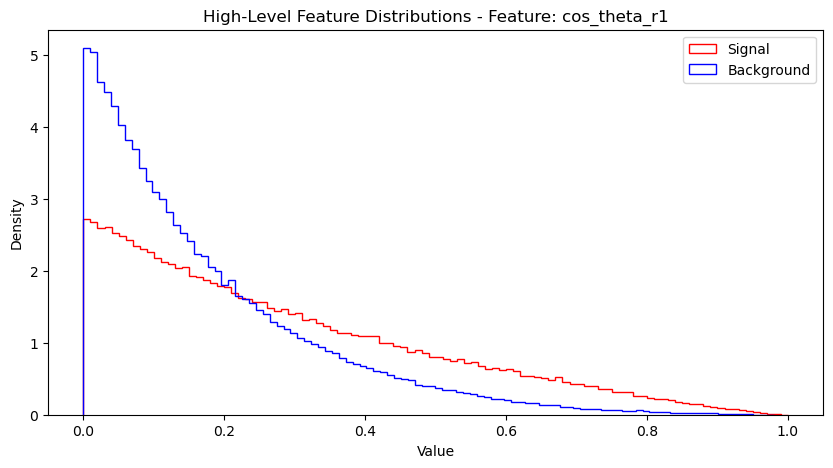

In [21]:
def plot_feature_distributions(features, signal, background, title):
    for feature in features:
        plt.figure(figsize=(10, 5))
        plt.hist(np.array(signal[feature]), bins=100, histtype="step", color="red", label="Signal", density=True, stacked=True)
        plt.hist(np.array(background[feature]), bins=100, histtype="step", color="blue", label="Background", density=True, stacked=True)
        plt.title(f'{title} - Feature: {feature}')
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.legend(loc='upper right')
        plt.show()

# Plot individual distributions
plot_feature_distributions(low_level_features, signal, background, 'Low-Level Feature Distributions')
plot_feature_distributions(high_level_features, signal, background, 'High-Level Feature Distributions')


## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY sample, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

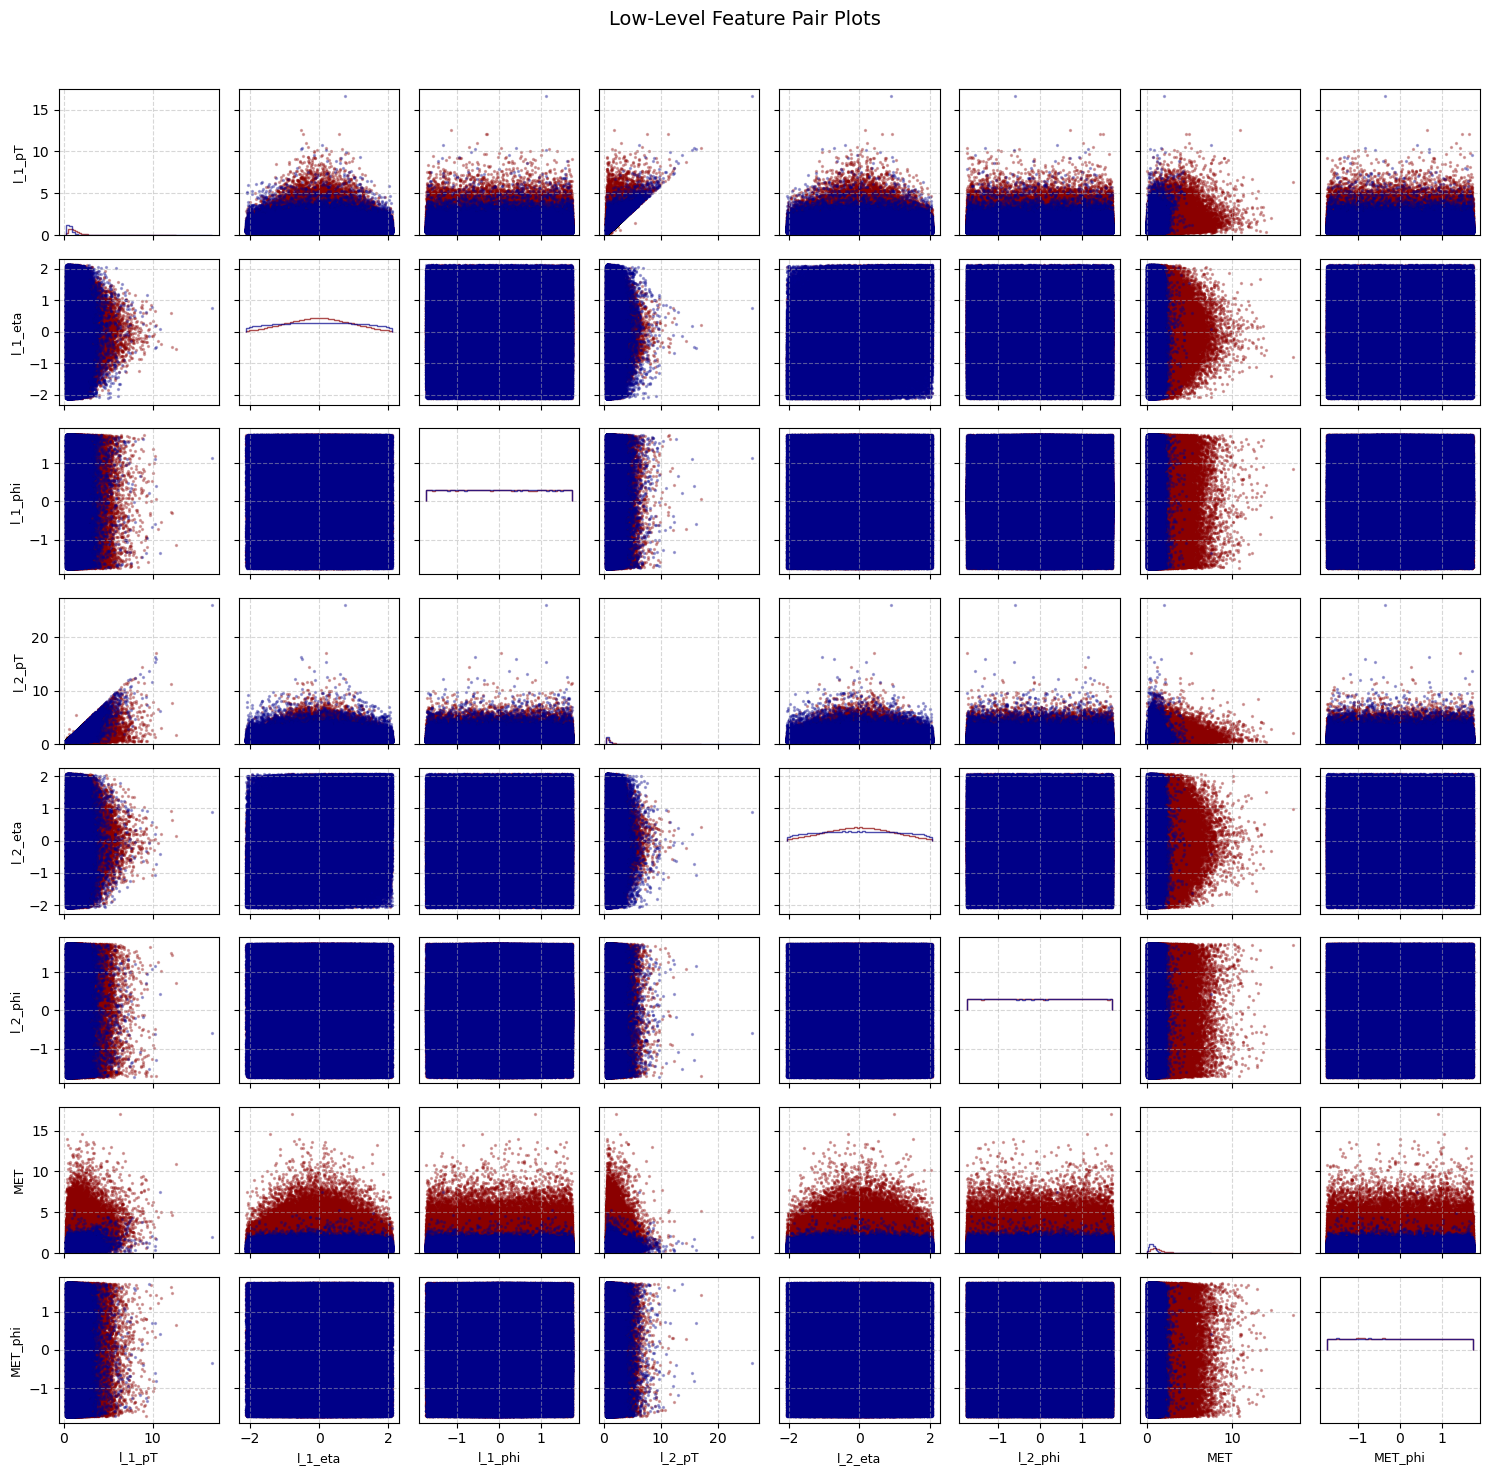

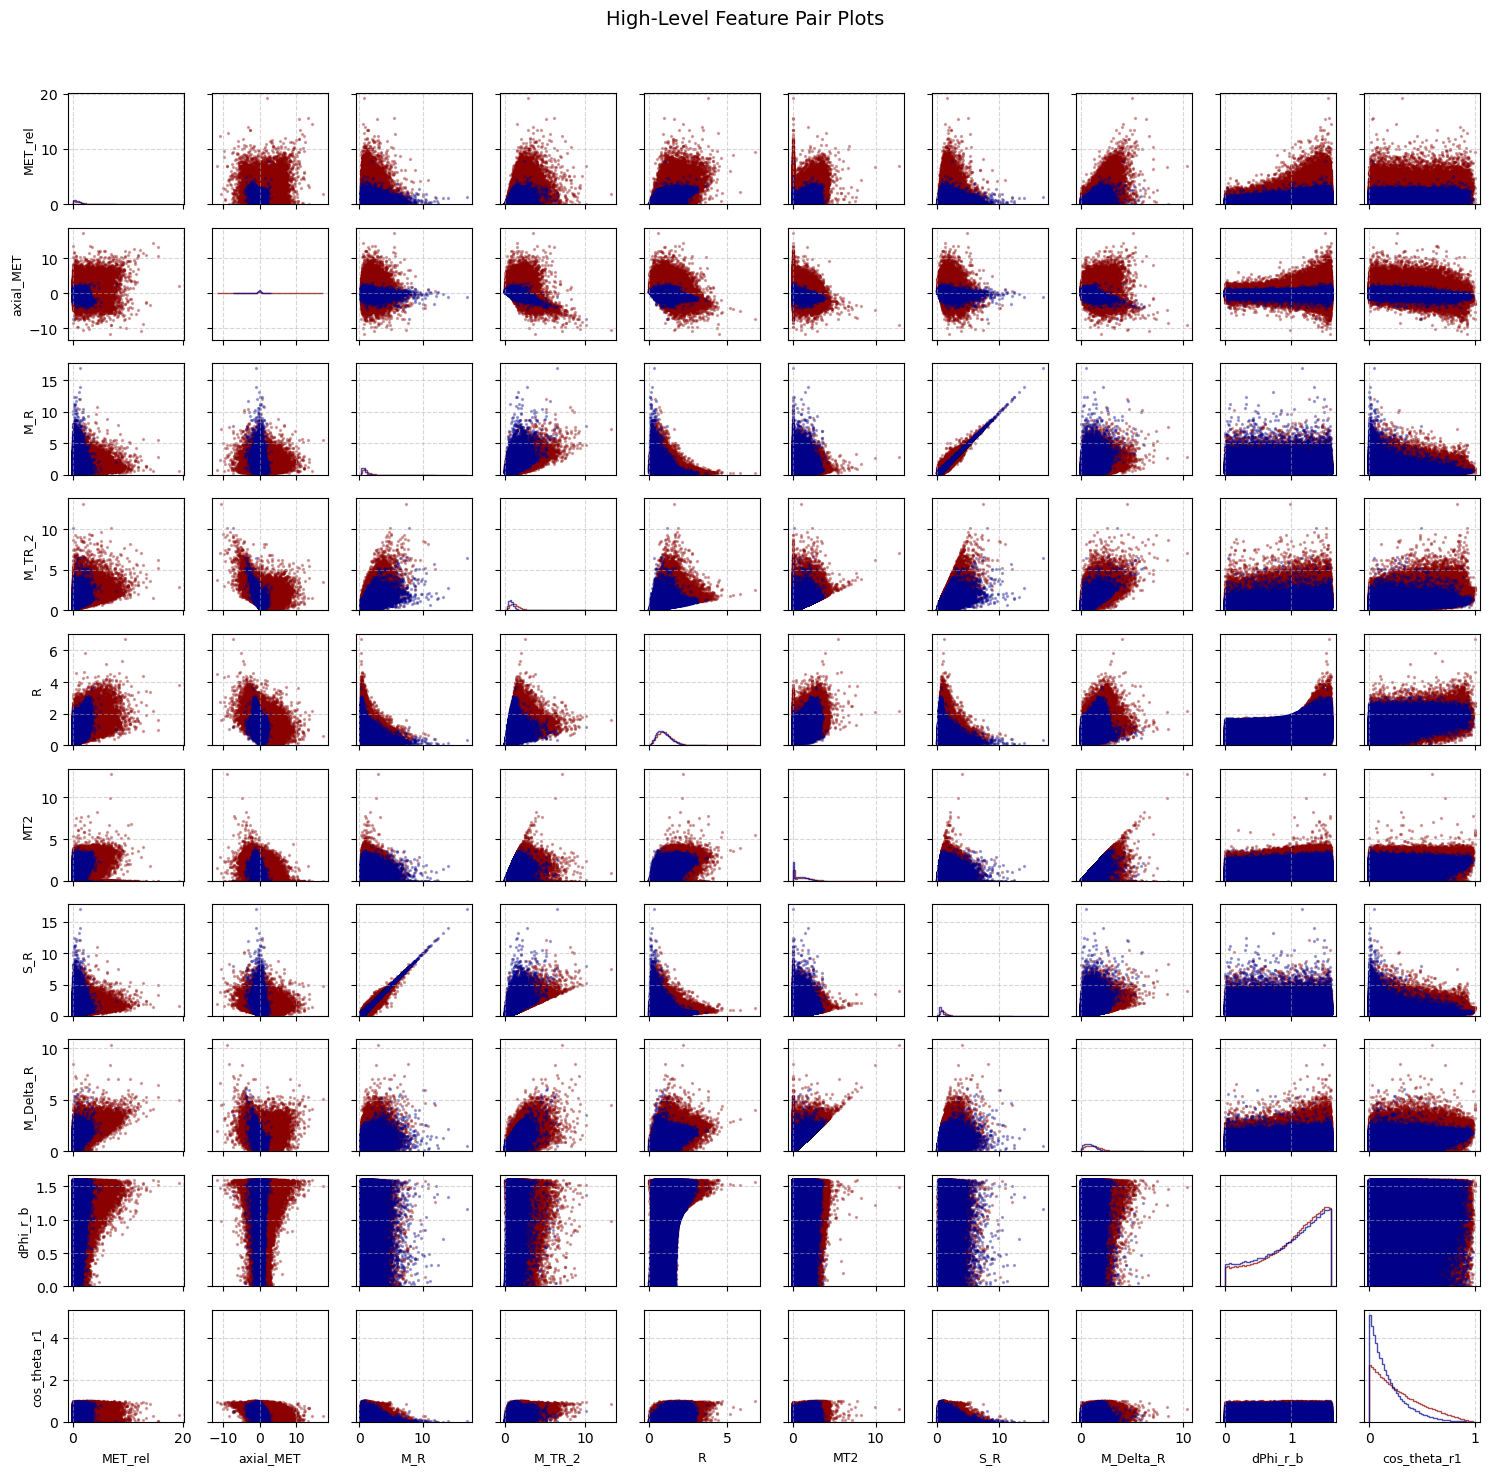

In [29]:
def plot_pairwise_scatter(features, signal, background, title):
    num_features = len(features)
    fig, axes = plt.subplots(num_features, num_features, figsize=(15, 15), sharex='col', sharey='row')
    
    for i in range(num_features):
        for j in range(num_features):
            ax = axes[i, j]
            if i == j:
                ax.hist(signal[features[i]], bins=50, histtype="step", color="darkred", density=True, alpha=0.7)
                ax.hist(background[features[i]], bins=50, histtype="step", color="darkblue", density=True, alpha=0.7)
            else:
                ax.scatter(signal[features[j]], signal[features[i]], color='darkred', alpha=0.3, s=2)
                ax.scatter(background[features[j]], background[features[i]], color='darkblue', alpha=0.3, s=2)
            
            if j == 0:
                ax.set_ylabel(features[i], fontsize=9)
            if i == num_features - 1:
                ax.set_xlabel(features[j], fontsize=9)
            ax.grid(True, linestyle='--', alpha=0.5)
    
    plt.suptitle(title, fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

plot_pairwise_scatter(low_level_features, signal, background, 'Low-Level Feature Pair Plots')
plot_pairwise_scatter(high_level_features, signal, background, 'High-Level Feature Pair Plots')

**Part b**  
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

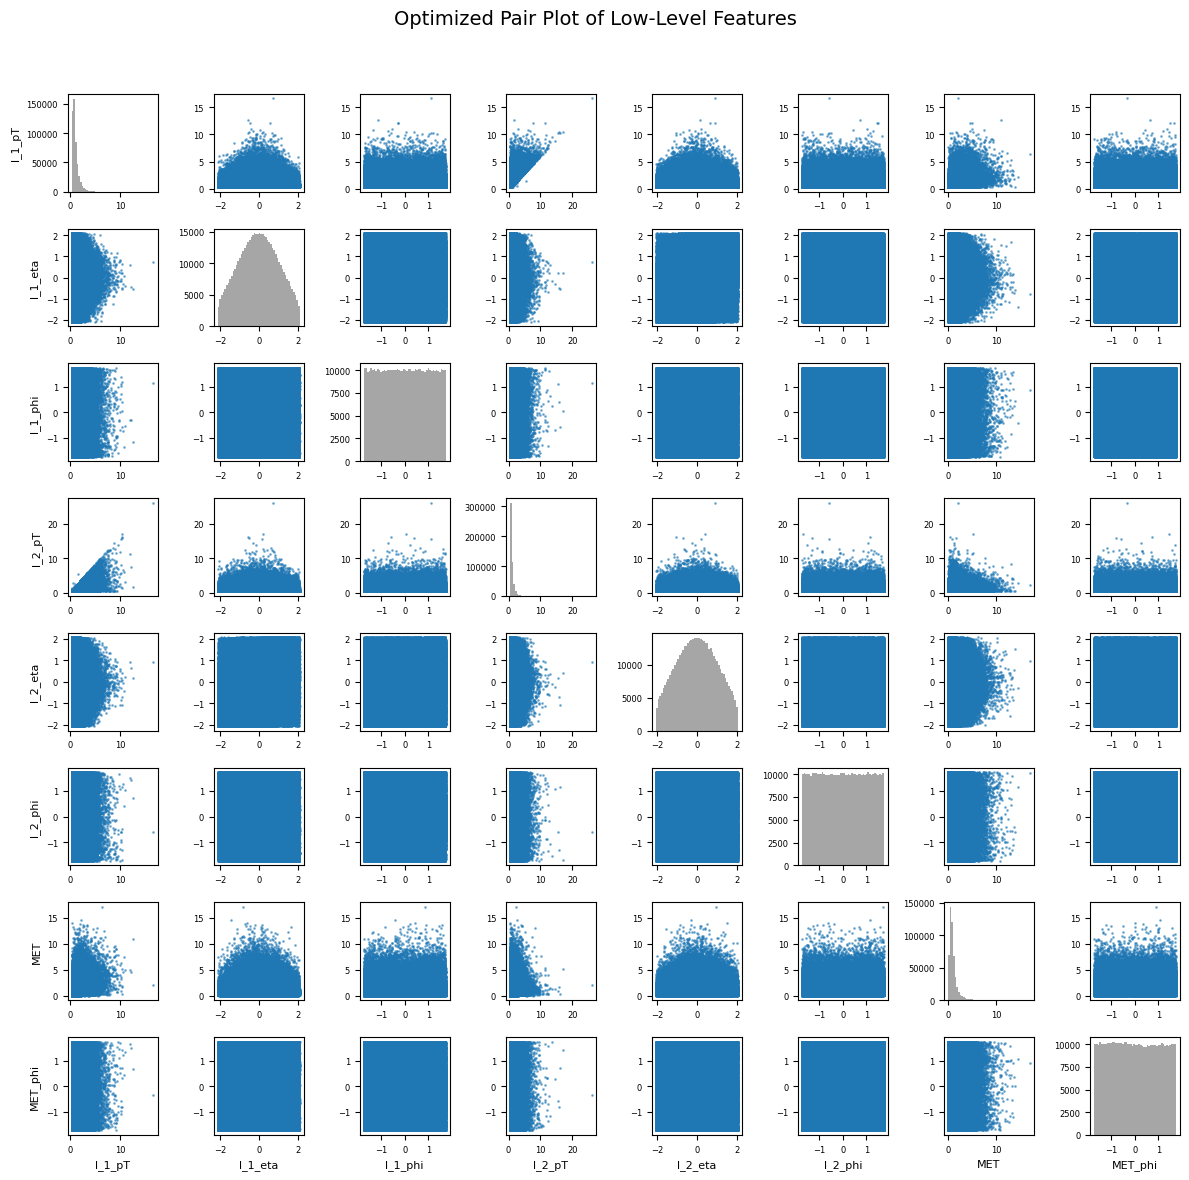

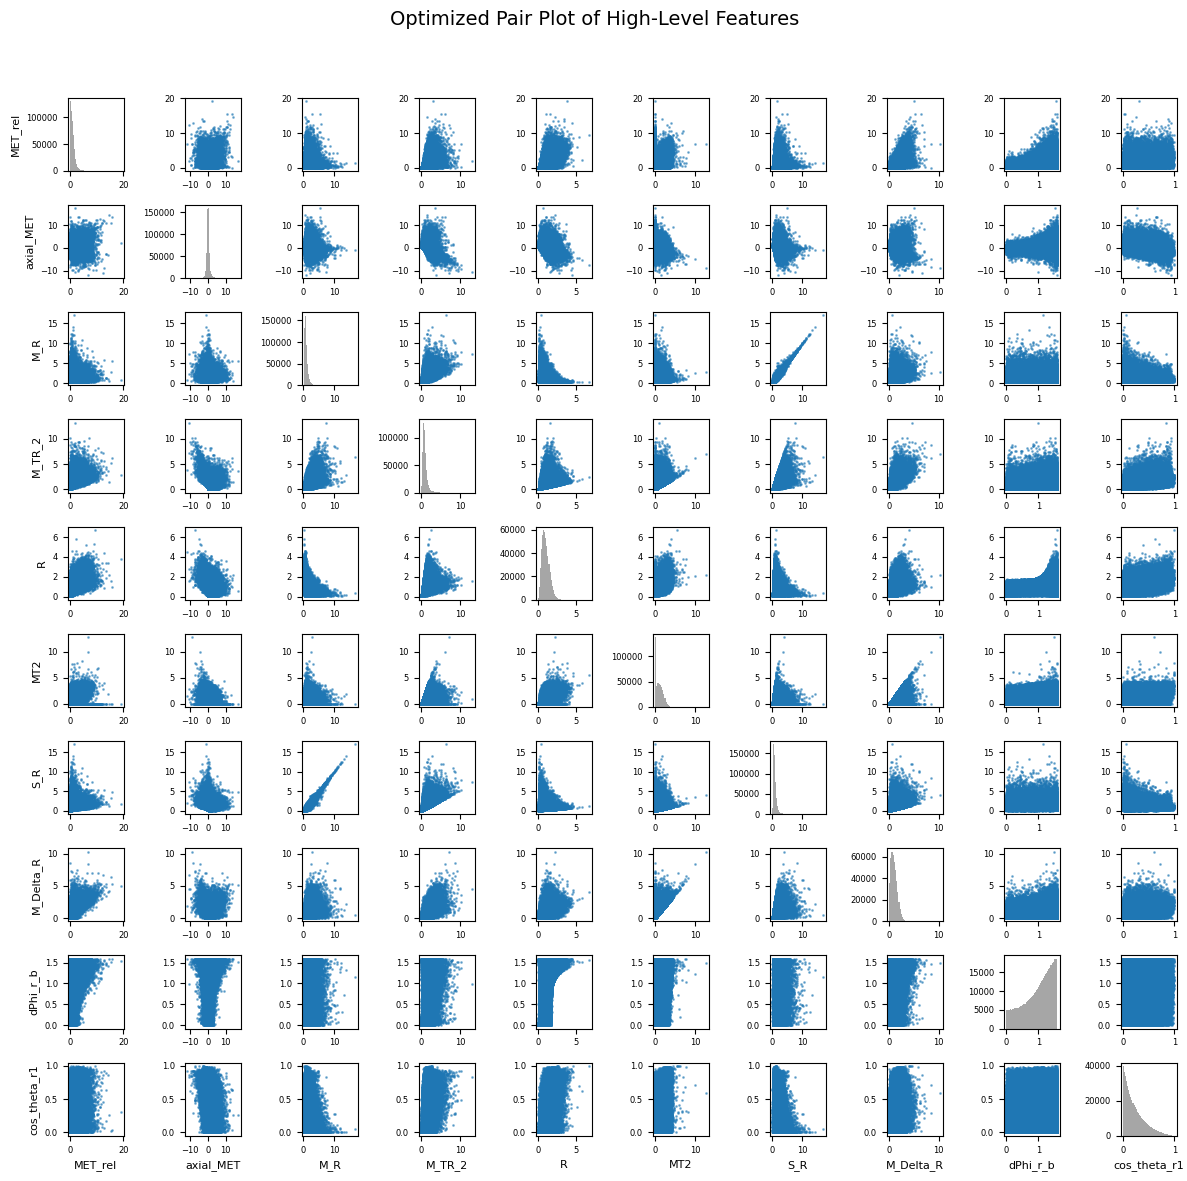

In [31]:
# Function to create pair plots efficiently
def plot_pairwise(features, title):
    num_features = len(features)
    fig, axes = plt.subplots(num_features, num_features, figsize=(12, 12))
    
    # Convert dataframe to numpy array for faster indexing
    data = df[features].values
    
    for i in range(num_features):
        for j in range(num_features):
            ax = axes[i, j]
            if i == j:
                ax.hist(data[:, i], bins=50, color='gray', alpha=0.7, histtype='stepfilled')  # Using 'stepfilled' for better performance
            else:
                ax.plot(data[:, j], data[:, i], 'o', markersize=1, alpha=0.5)  # Using plot instead of scatter for speed
            
            if i == num_features - 1:
                ax.set_xlabel(features[j], fontsize=8)
            if j == 0:
                ax.set_ylabel(features[i], fontsize=8)
            ax.tick_params(axis='both', which='major', labelsize=6)
    
    plt.suptitle(title, fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

plot_pairwise(low_level_features, 'Optimized Pair Plot of Low-Level Features')
plot_pairwise(high_level_features, 'Optimized Pair Plot of High-Level Features')


**Part c**  
Which observables appear to be best for separating signal from background?

**M_TR_2, M_Delta_r and L1_pt**  
Theese seem best for seperating signal from background.

### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate). 

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.


In [19]:
#Part a:

from IPython.display import HTML, display
from tabulate import tabulate

In [20]:
#Part b:

low_level_data = df[low_level_features]
high_level_data = df[high_level_features]

# Compute the covariance matrix for all features
cov_all = np.cov(df[VarNames].values, rowvar=False)

# Compute the correlation matrix for all features
corr_all = np.corrcoef(df[VarNames].values, rowvar=False)

# Compute the covariance matrix for low-level features
cov_low = np.cov(low_level_data.values, rowvar=False)

# Compute the correlation matrix for low-level features
corr_low = np.corrcoef(low_level_data.values, rowvar=False)

# Compute the covariance matrix for high-level features
cov_high = np.cov(high_level_data.values, rowvar=False)

# Compute the correlation matrix for high-level features
corr_high = np.corrcoef(high_level_data.values, rowvar=False)


print("Covariance matrix for all features:")
print(cov_all)

print("\nCorrelation matrix for all features:")
print(corr_all)

print("\nCovariance matrix for low-level features:")
print(cov_low)

print("\nCorrelation matrix for low-level features:")
print(corr_low)

print("\nCovariance matrix for high-level features:")
print(cov_high)

print("\nCorrelation matrix for high-level features:")
print(corr_high)

Covariance matrix for all features:
[[ 2.48277416e-01  1.33232757e-01  2.12325710e-04  2.16279213e-04
   6.39160758e-02  7.12813644e-04  1.69378344e-04  1.91292671e-01
  -2.94538711e-04  1.25444316e-01  3.95416984e-02  8.43578631e-02
   1.23325980e-01  2.55957040e-02  3.41362834e-02  8.06149789e-02
   8.51836173e-02  7.12762018e-03  2.61996466e-02]
 [ 1.33232757e-01  4.67481925e-01 -3.96674207e-04  7.66214265e-05
   3.05037988e-01 -3.48826988e-04  7.37336647e-04  2.28434336e-01
  -9.36714374e-04  9.75240349e-02 -9.73253567e-03  3.64432455e-01
   2.87223483e-01 -5.97024601e-02 -1.23988205e-02  3.42587023e-01
   9.77389248e-02 -4.69491360e-02  2.21632465e-02]
 [ 2.12325710e-04 -3.96674207e-04  1.00430144e+00 -8.57630732e-04
  -1.62905654e-04  4.08312894e-01 -1.04201049e-03 -2.14697798e-03
  -5.88968323e-04 -1.37057212e-03 -1.10889241e-03 -5.53826632e-04
  -6.68920291e-04  3.01299870e-04  4.27122683e-04 -6.04009571e-04
  -9.87471350e-04 -7.40330277e-04  3.21632240e-04]
 [ 2.16279213e-04  


 
#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook. 

In [22]:

# Function to format matrix (using tabulate) as an HTML table
def format_matrix_html(matrix, headers, title):
    formatted_matrix = np.round(matrix, 2).tolist()
    table = tabulate(formatted_matrix, headers=headers, tablefmt="html", floatfmt=".2f")
    styled_table = f"<h3>{title}</h3>" + table
    return HTML(styled_table)

# Display covariance and correlation tables in HTML format
display(format_matrix_html(cov_all, VarNames, "Covariance Matrix for All Features"))
display(format_matrix_html(corr_all, VarNames, "Correlation Matrix for All Features"))

display(format_matrix_html(cov_low, low_level_features, "Covariance Matrix for Low-Level Features"))
display(format_matrix_html(corr_low, low_level_features, "Correlation Matrix for Low-Level Features"))

display(format_matrix_html(cov_high, high_level_features, "Covariance Matrix for High-Level Features"))
display(format_matrix_html(corr_high, high_level_features, "Correlation Matrix for High-Level Features"))

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.

In [31]:
def compute_and_display_matrices(df, feature_set, feature_names, feature_title):

    data = df[feature_set]
    
    matrices = {
        f"Covariance Matrix for {feature_title}": np.cov(data.values, rowvar=False),
        f"Correlation Matrix for {feature_title}": np.corrcoef(data.values, rowvar=False)
    }
    
    def format_matrix_html(matrix, headers, title):
        formatted_matrix = np.round(matrix, 2).tolist()
        table = tabulate(formatted_matrix, headers=headers, tablefmt="html", floatfmt=".2f")
        styled_table = f"<h3>{title}</h3>" + table
        return HTML(styled_table)
    
    for title, matrix in matrices.items():
        display(format_matrix_html(matrix, feature_names, title))

compute_and_display_matrices(df, VarNames, VarNames, "All Features")
compute_and_display_matrices(df, low_level_features, low_level_features, "Low-Level Features")
compute_and_display_matrices(df, high_level_features, high_level_features, "High-Level Features")

## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal: 

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

Condition 1: 'l_1_pt', 'M_Delta_R', 'cos_theta_r1', 'M_R','M_TR_2','MT2','MET'  
Condition 2: 'R','MET_rel','dPhi_r_b'  
Condition 3: 'axial_MET','S_R','MET_phi'  
Condition 4: 'l_1_eta','l_1_phi','l_2_pT','l_2_eta','l_2_phi'  

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable. 

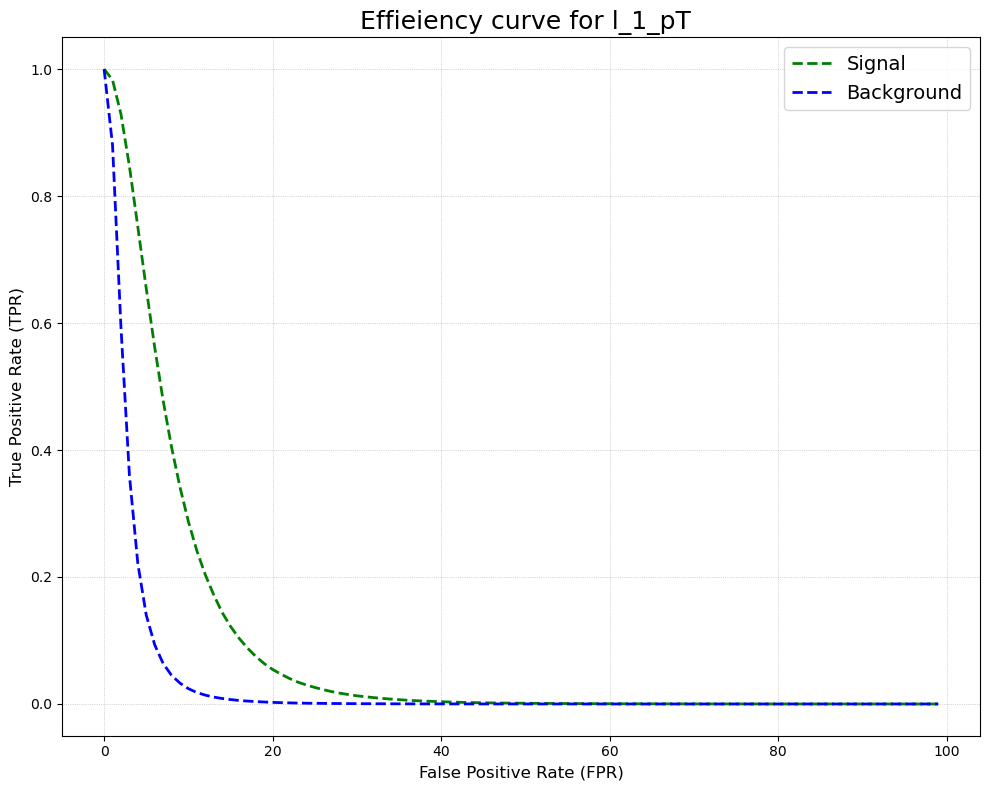

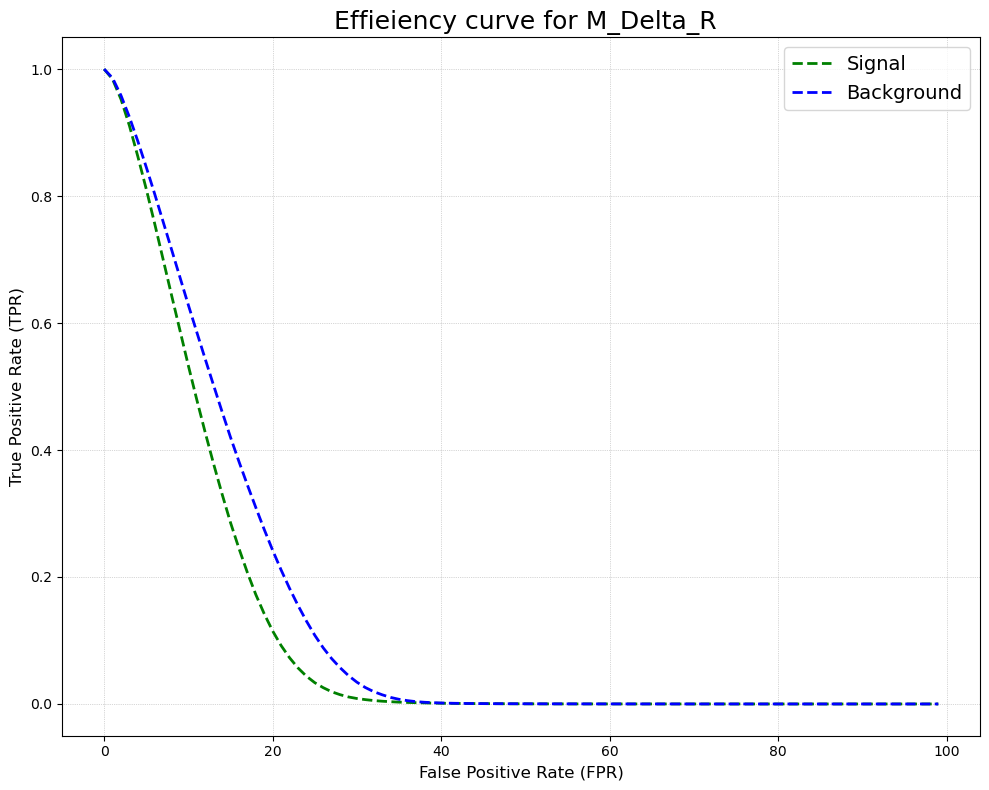

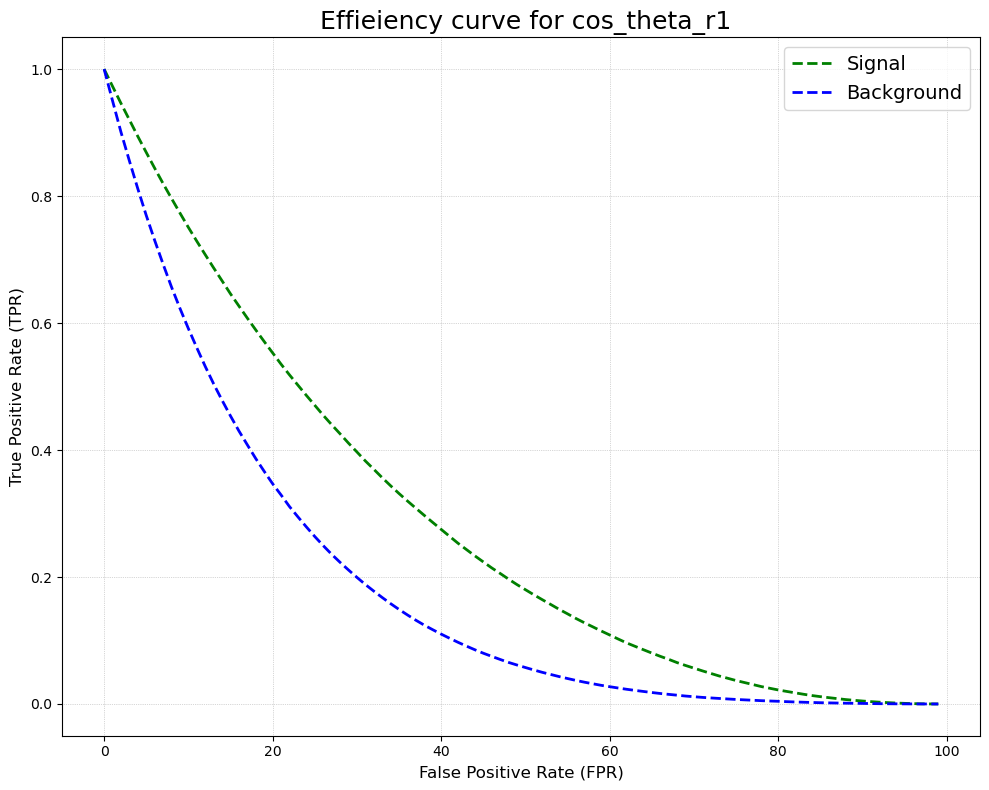

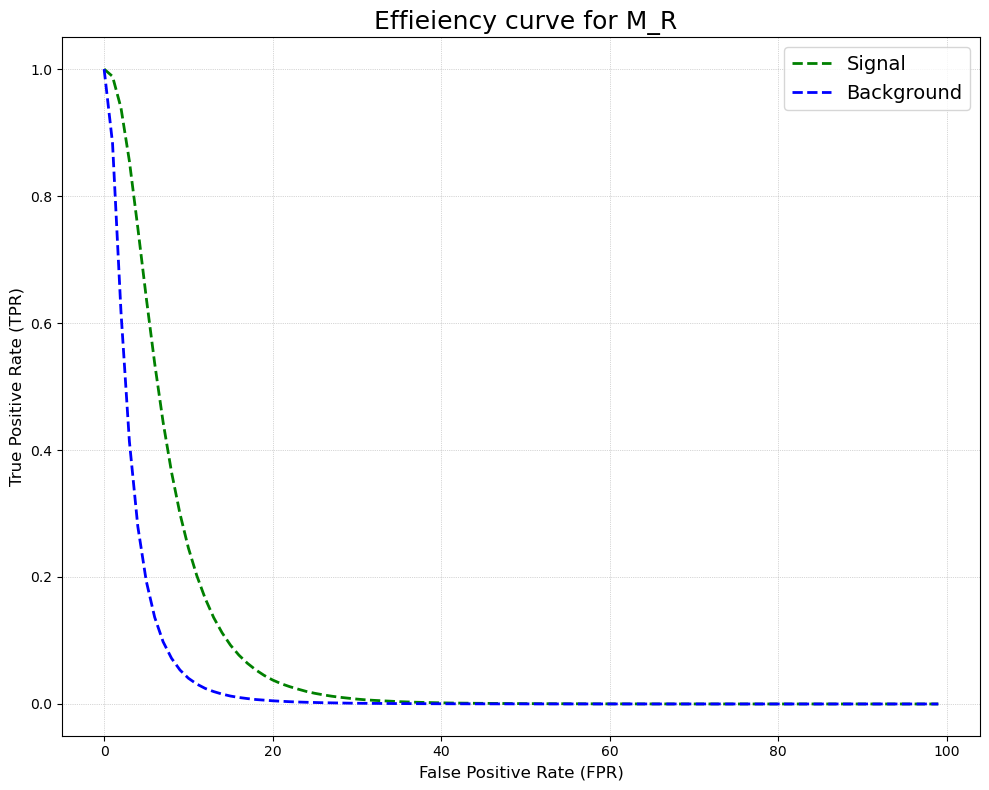

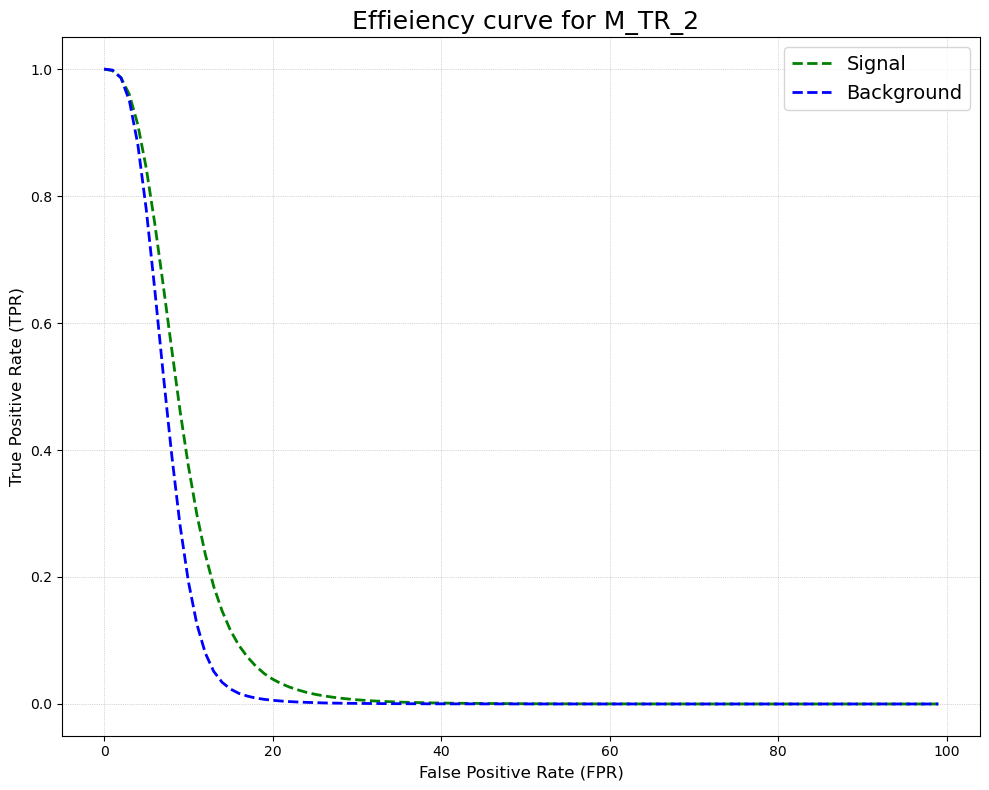

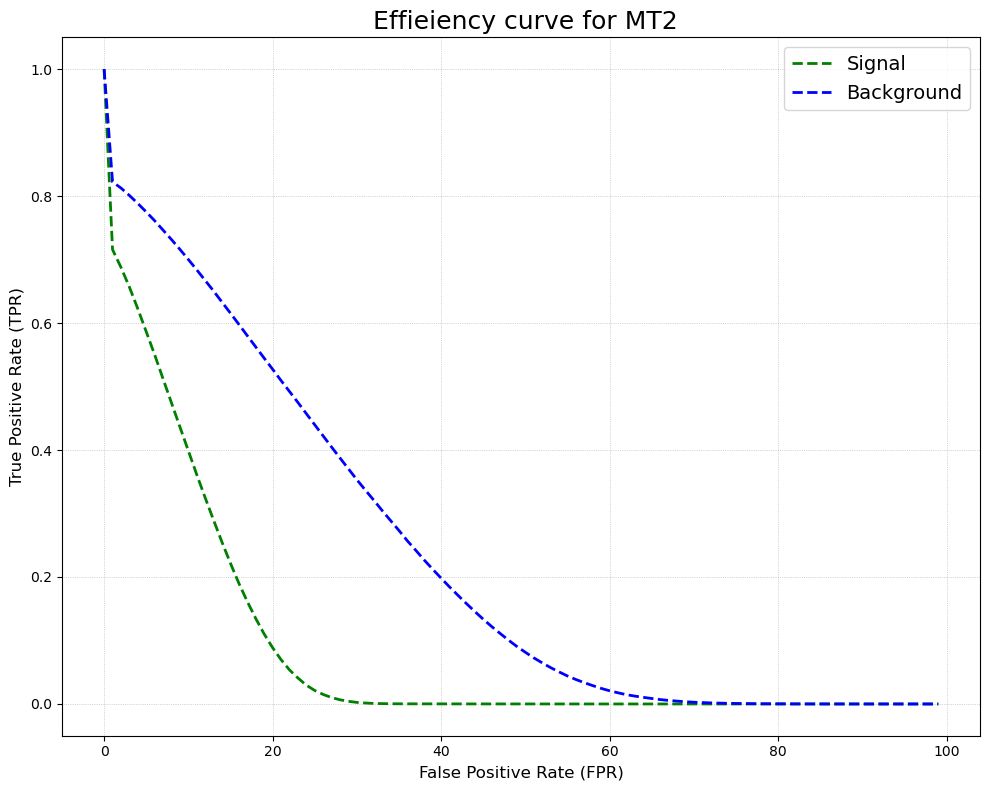

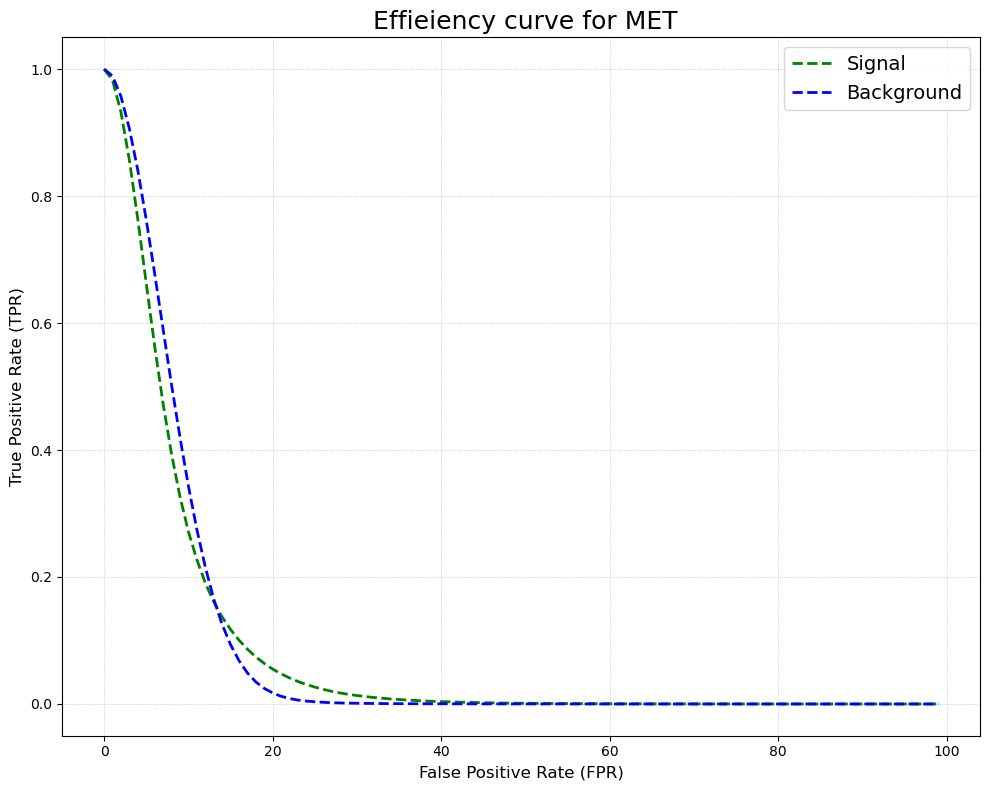

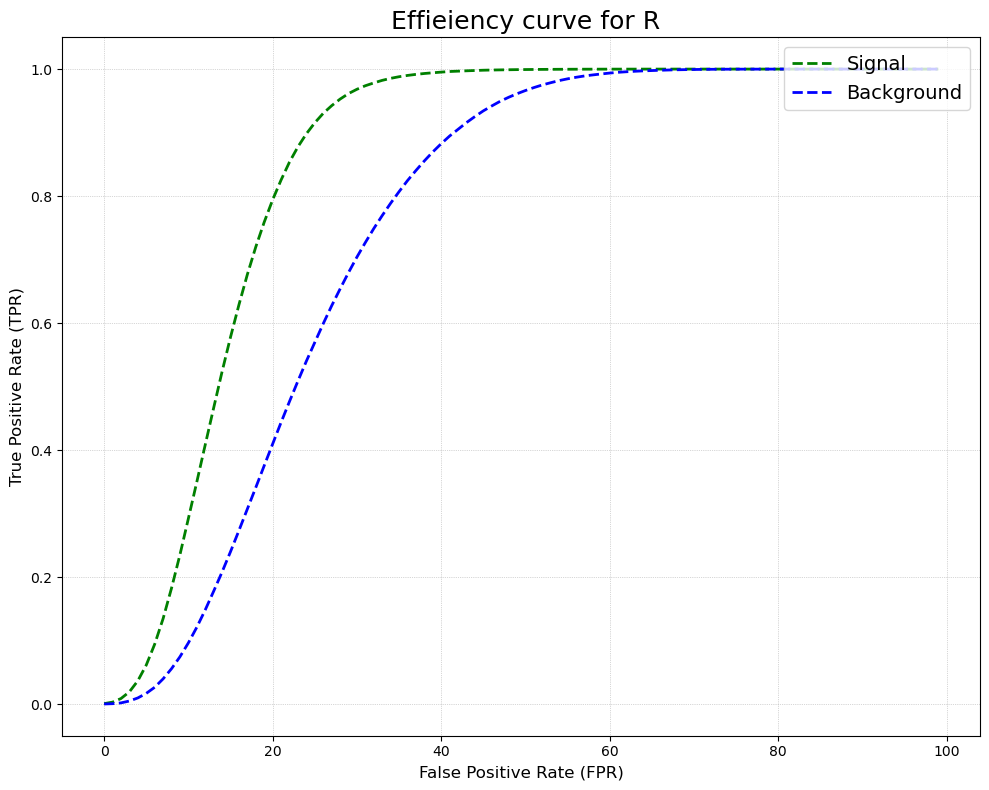

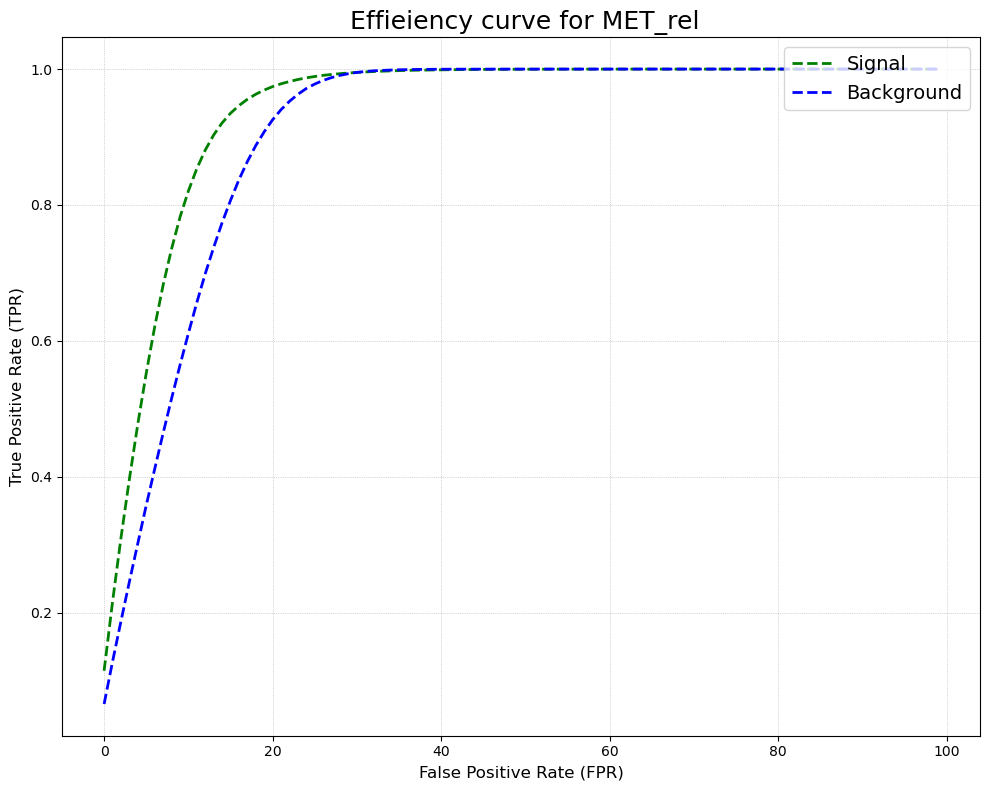

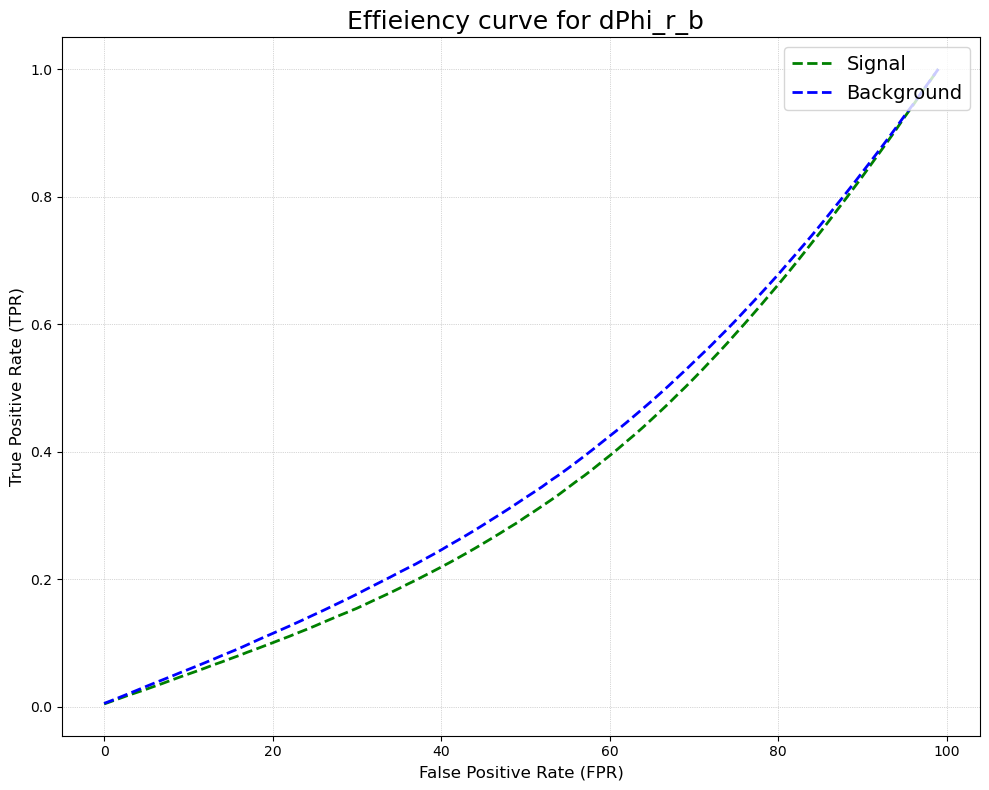

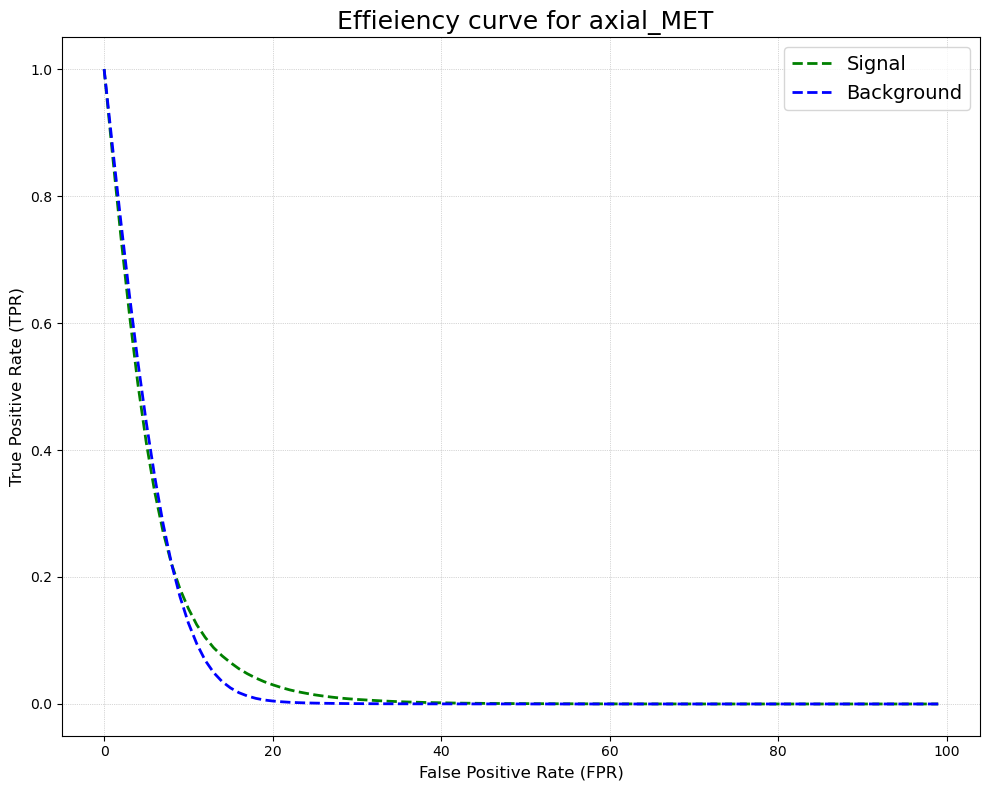

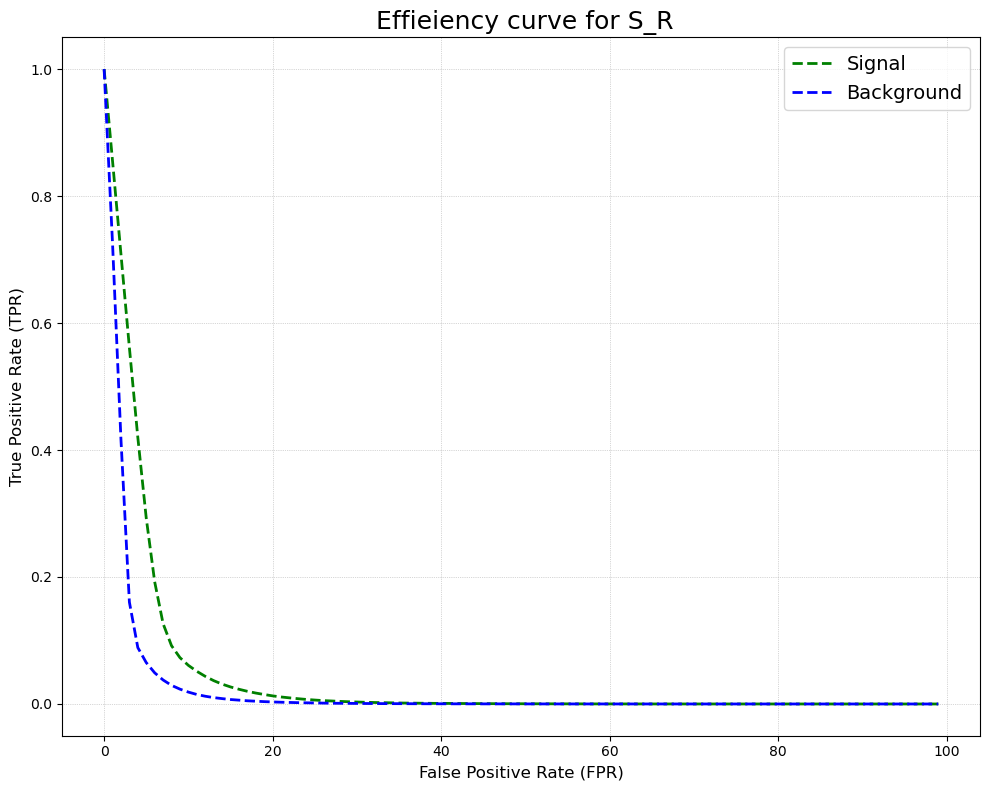

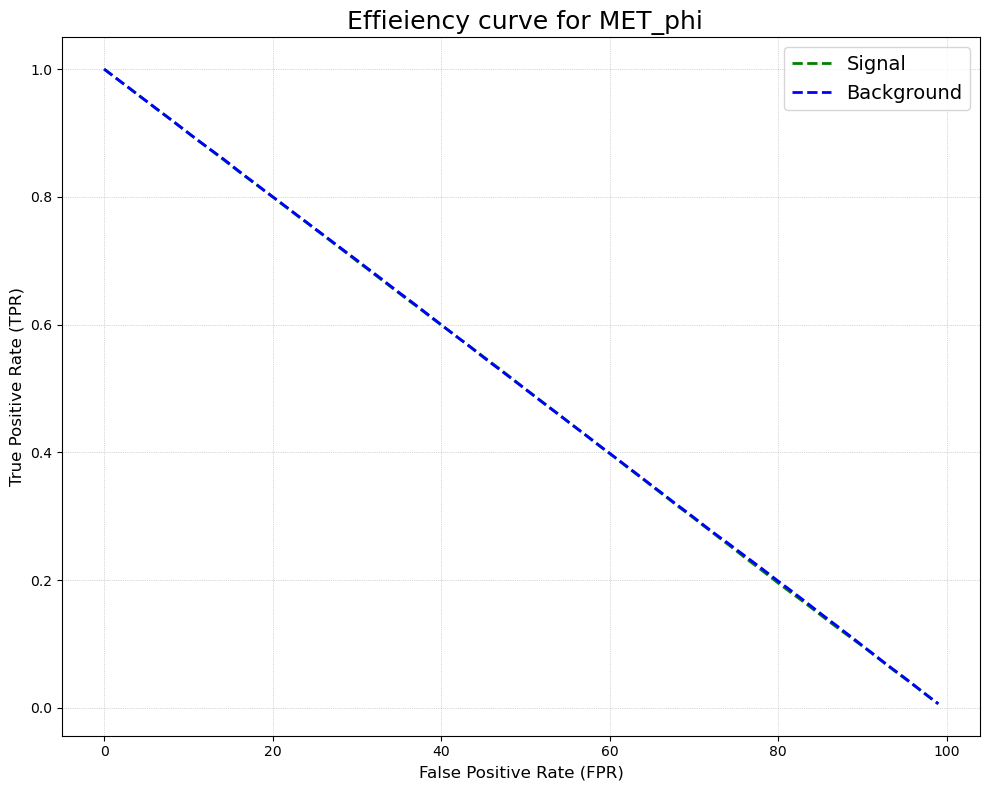

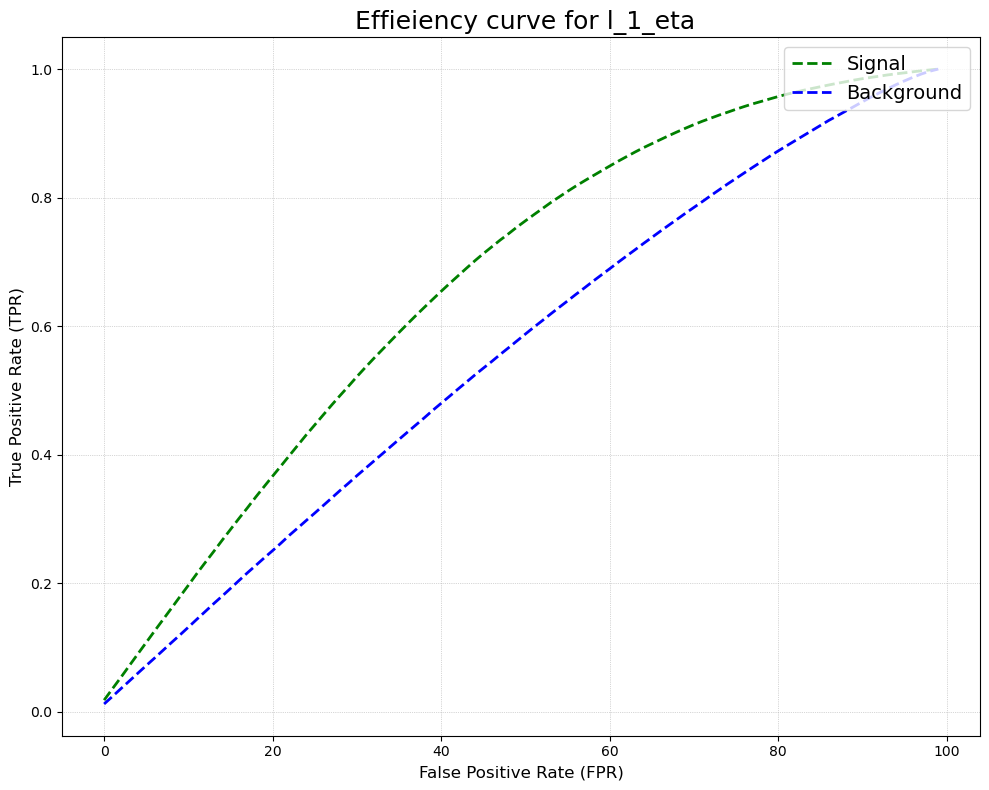

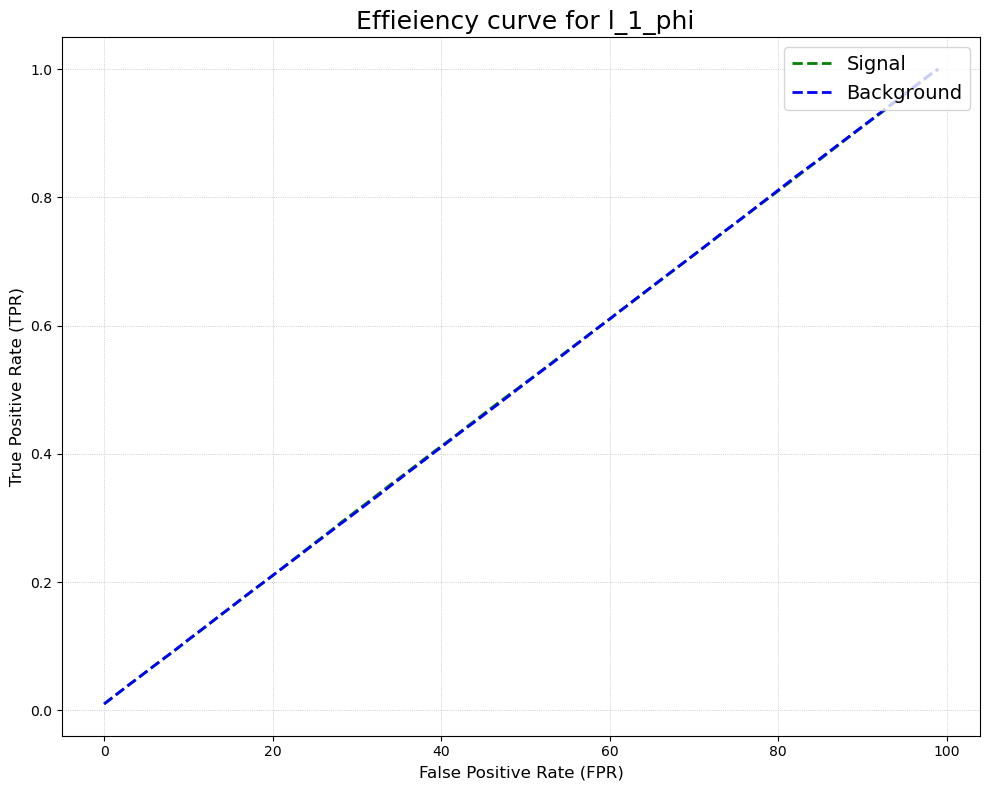

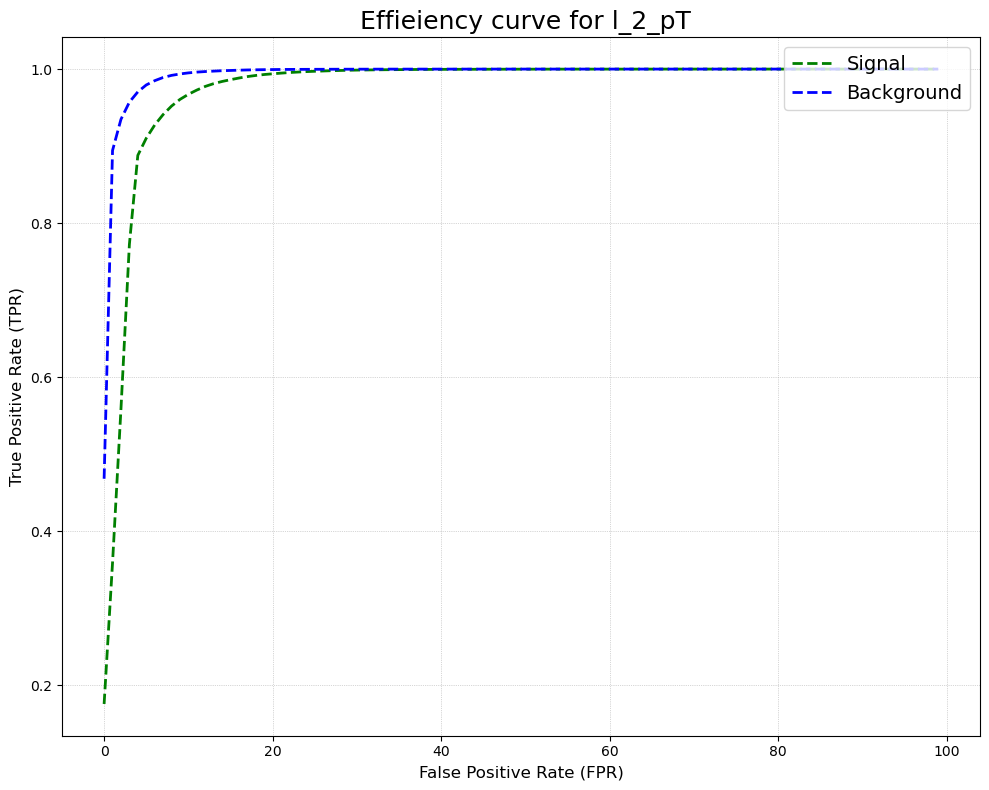

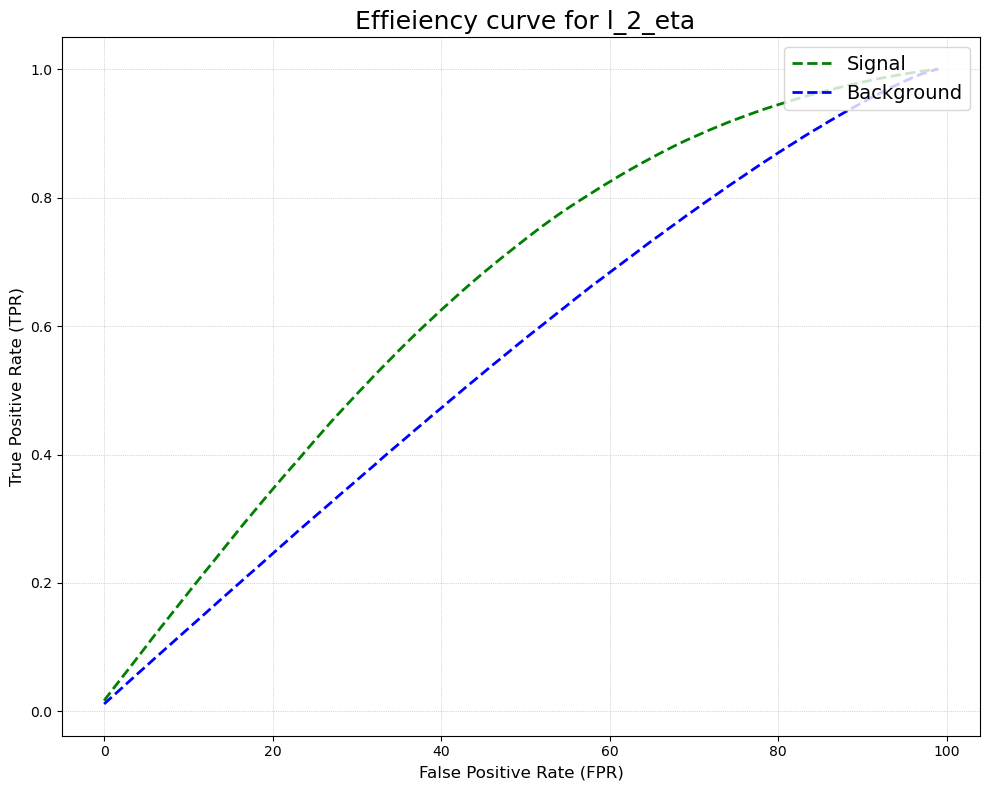

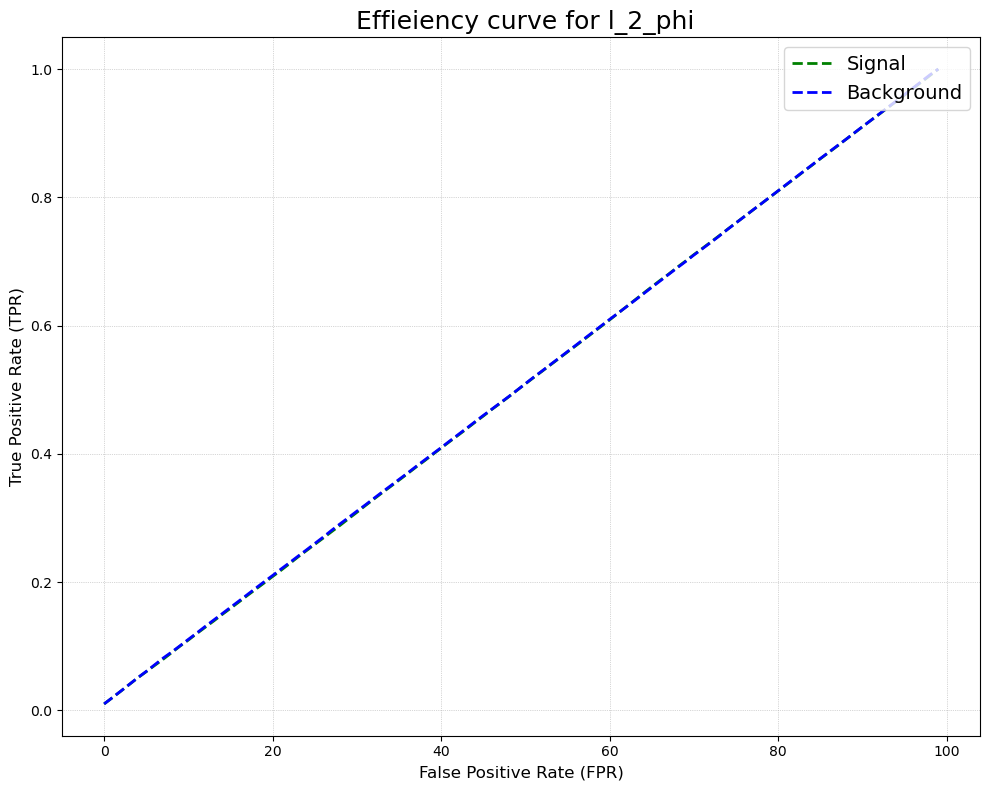

In [99]:
def compute_efficiency(data, condition, bins=100):
    if condition == 1:  # x > xc
        hist, bin_edges = np.histogram(data, bins=bins, density=True)
        rate = np.cumsum(hist[::-1])[::-1] * (bin_edges[1] - bin_edges[0])
    elif condition == 2:  # x < xc
        hist, bin_edges = np.histogram(data, bins=bins, density=True)
        rate = np.cumsum(hist) * (bin_edges[1] - bin_edges[0])
    elif condition == 3:  # |x - mu| > xc
        mean_data = np.mean(data)
        hist, bin_edges = np.histogram(np.abs(data - mean_data), bins=bins, density=True)
        rate = np.cumsum(hist[::-1])[::-1] * (bin_edges[1] - bin_edges[0])
    elif condition == 4:  # |x - mu| < xc
        mean_data = np.mean(data)
        hist, bin_edges = np.histogram(np.abs(data - mean_data), bins=bins, density=True)
        rate = np.cumsum(hist) * (bin_edges[1] - bin_edges[0])
    else:
        raise ValueError("Invalid condition specified. Must be 1, 2, 3, or 4.")
    
    return rate, bin_edges

def plot_efficiency(signal_data, background_data, observable_name, condition, bins=100):

    tpr, _ = compute_efficiency(signal_data[observable_name], condition, bins)
    fpr, _ = compute_efficiency(background_data[observable_name], condition, bins)

    plt.figure(figsize=(10, 8))
    

    plt.plot(tpr, label="Signal", color='green', linestyle='--',linewidth=2)
    plt.plot(fpr, label="Background", linestyle='--', color='blue', linewidth=2)

    plt.xlabel('False Positive Rate (FPR)', fontsize=12)
    plt.ylabel('True Positive Rate (TPR)', fontsize=12)
    plt.title(f' Effieiency curve for {observable_name}', fontsize=18)

 
    plt.grid(True, which='both', linestyle=':', linewidth=0.5)
    plt.legend(loc='upper right', fontsize=14)
    plt.tight_layout()
    plt.show()
    
#For Condition 1
plot_efficiency(signal, background, 'l_1_pT', condition=1)
plot_efficiency(signal, background, 'M_Delta_R', condition=1)
plot_efficiency(signal, background, 'cos_theta_r1', condition=1)
plot_efficiency(signal, background, 'M_R', condition=1)
plot_efficiency(signal, background, 'M_TR_2', condition=1)
plot_efficiency(signal, background, 'MT2', condition=1)
plot_efficiency(signal, background, 'MET', condition=1)


#For Condition 2
plot_efficiency(signal, background, 'R', condition=2)
plot_efficiency(signal, background, 'MET_rel', condition=2)
plot_efficiency(signal, background, 'dPhi_r_b', condition=2)

#for Condition 3
plot_efficiency(signal, background, 'axial_MET', condition=3)
plot_efficiency(signal, background, 'S_R', condition=3)
plot_efficiency(signal, background, 'MET_phi', condition=3)

#For condition 4
plot_efficiency(signal, background, 'l_1_eta', condition=4)
plot_efficiency(signal, background, 'l_1_phi', condition=4)
plot_efficiency(signal, background, 'l_2_pT', condition=4)
plot_efficiency(signal, background, 'l_2_eta', condition=4)
plot_efficiency(signal, background, 'l_2_phi', condition=4)


### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where 

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

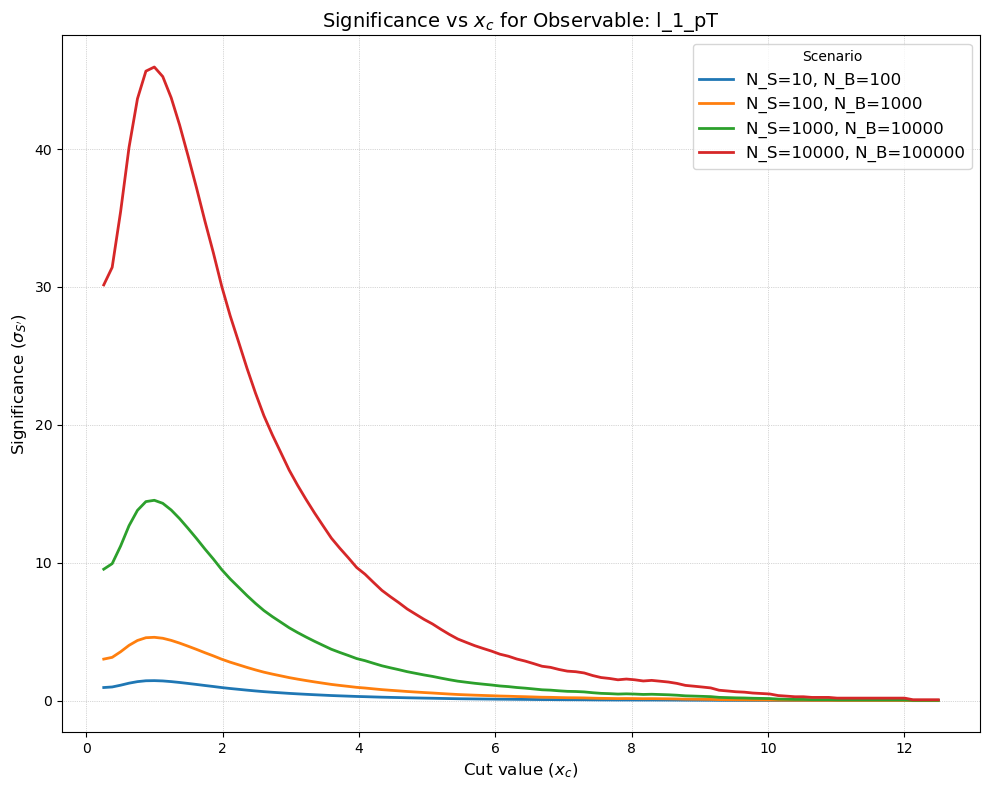

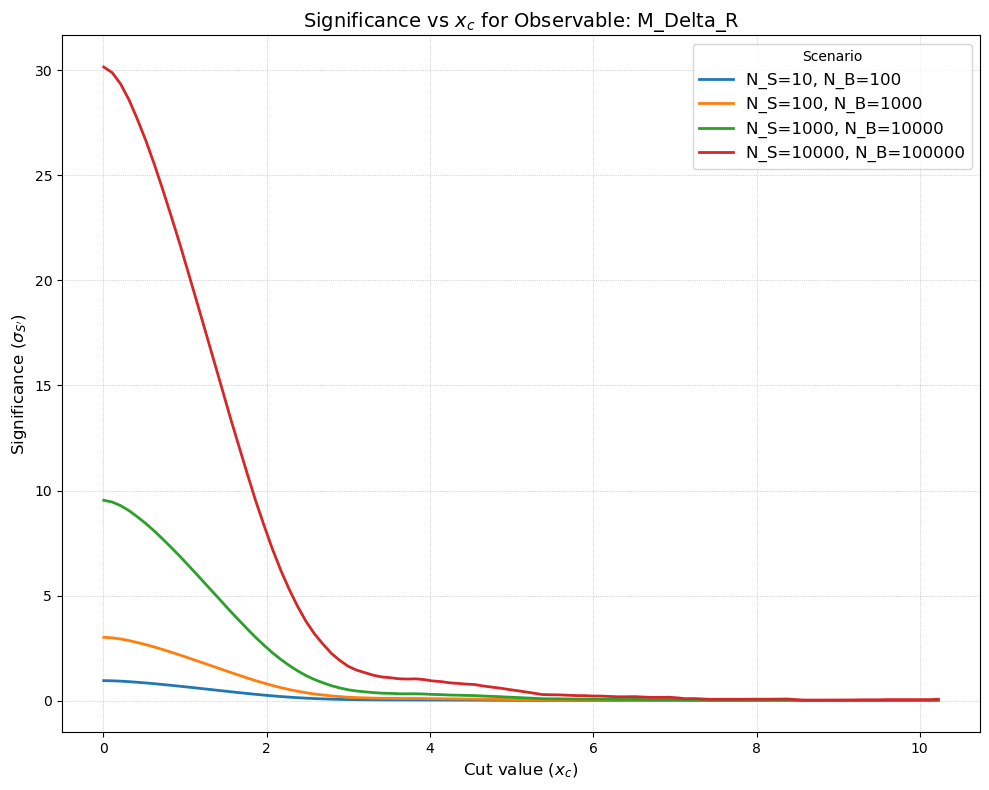

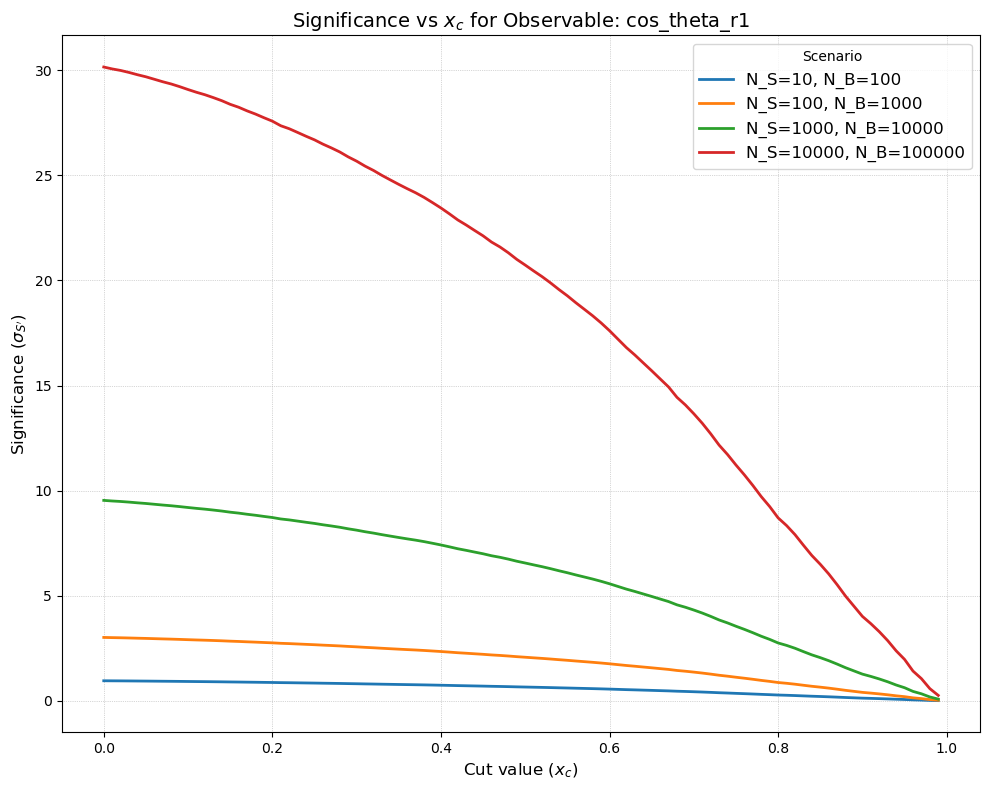

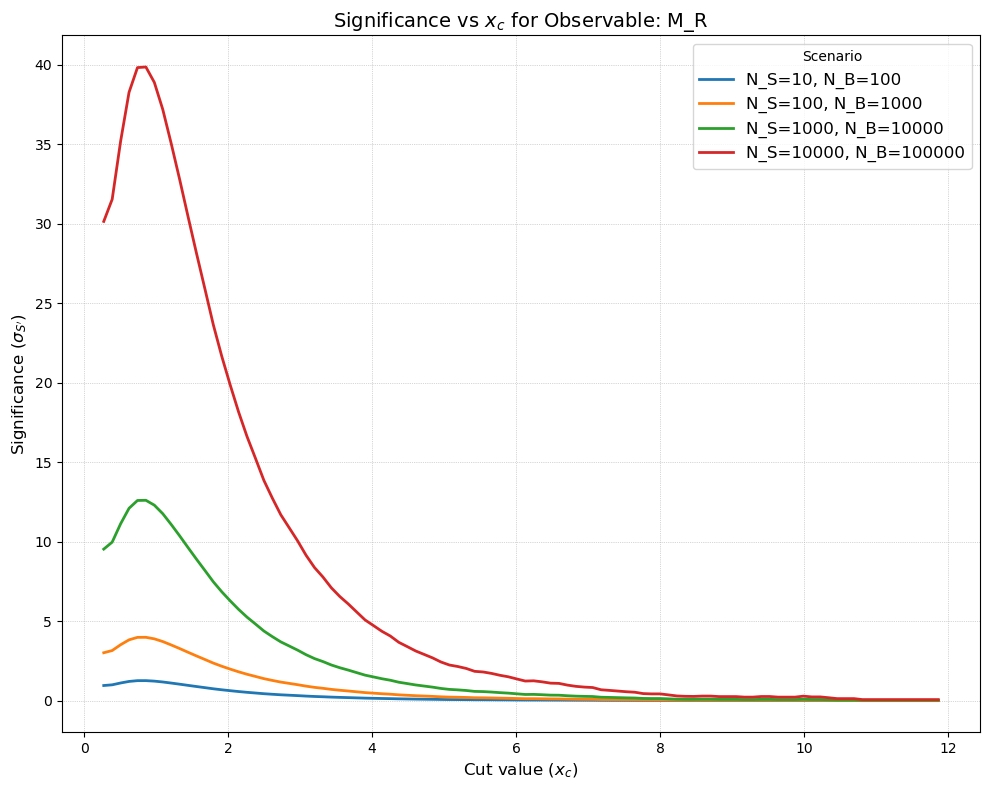

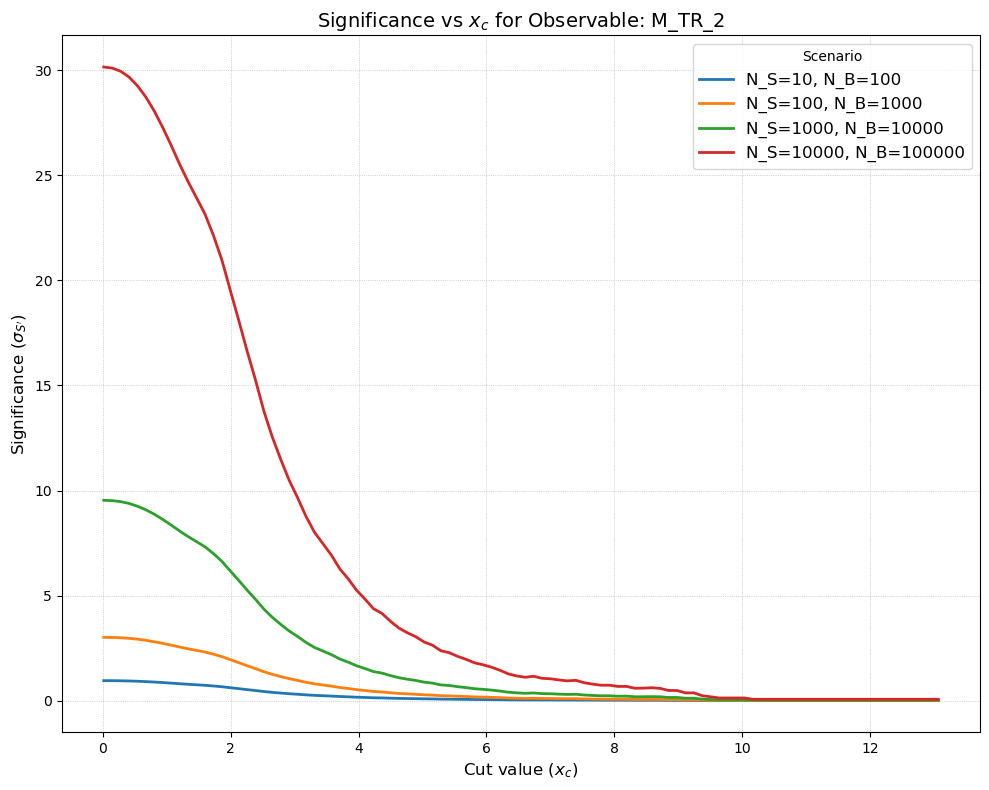

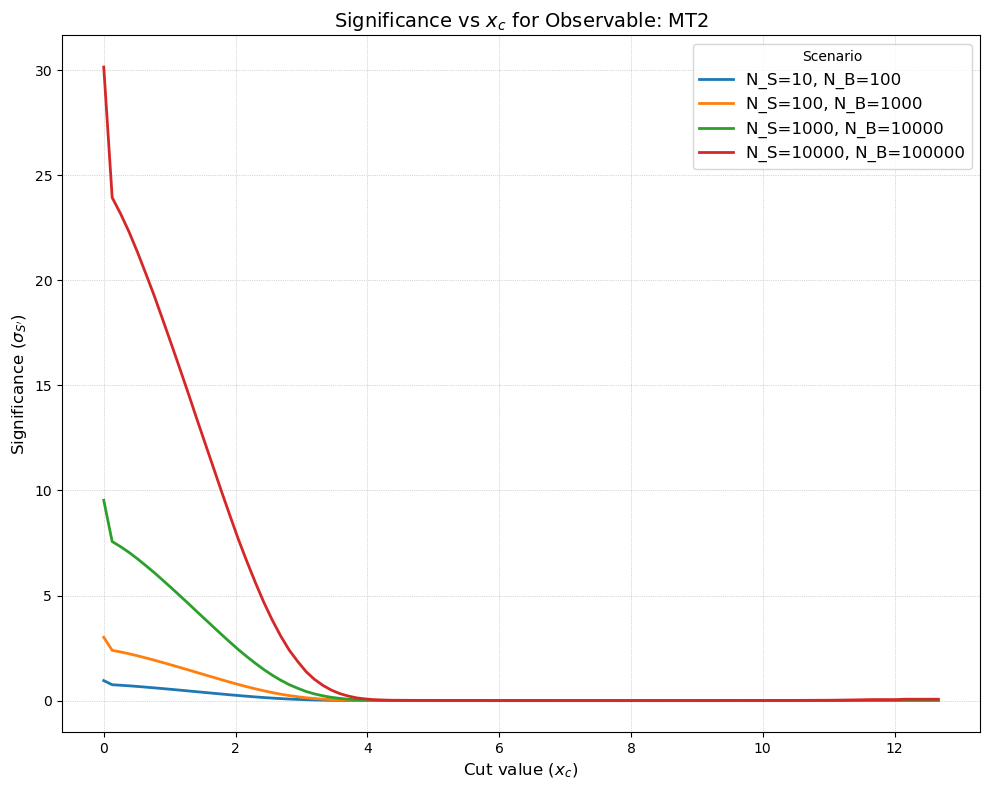

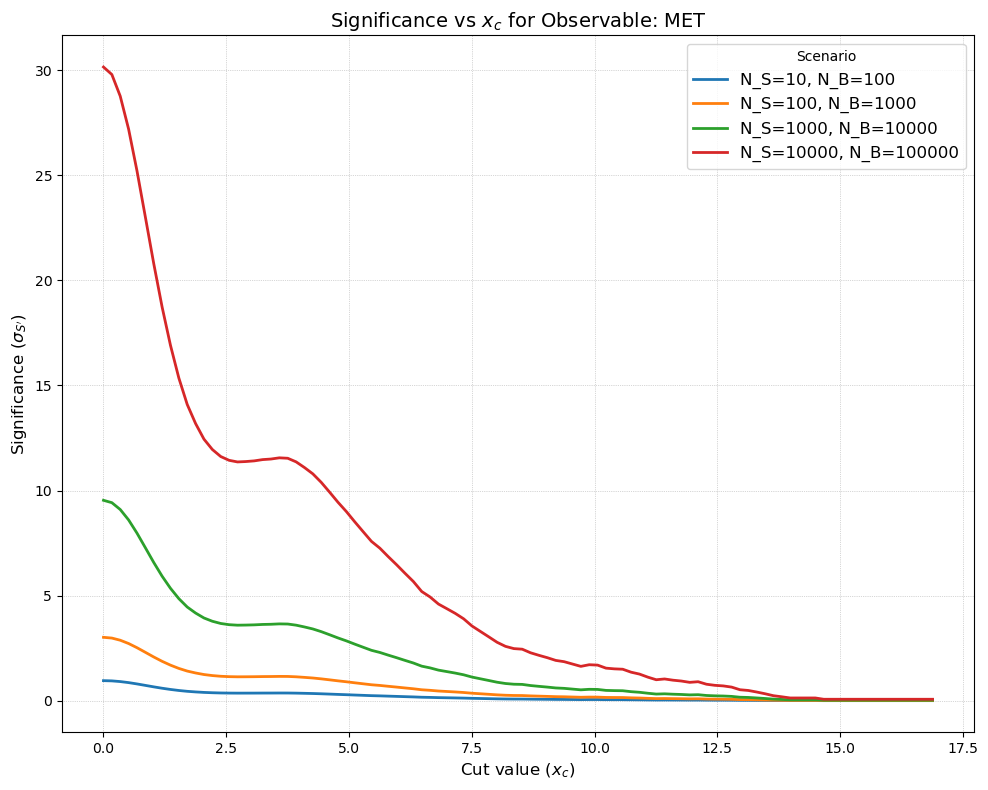

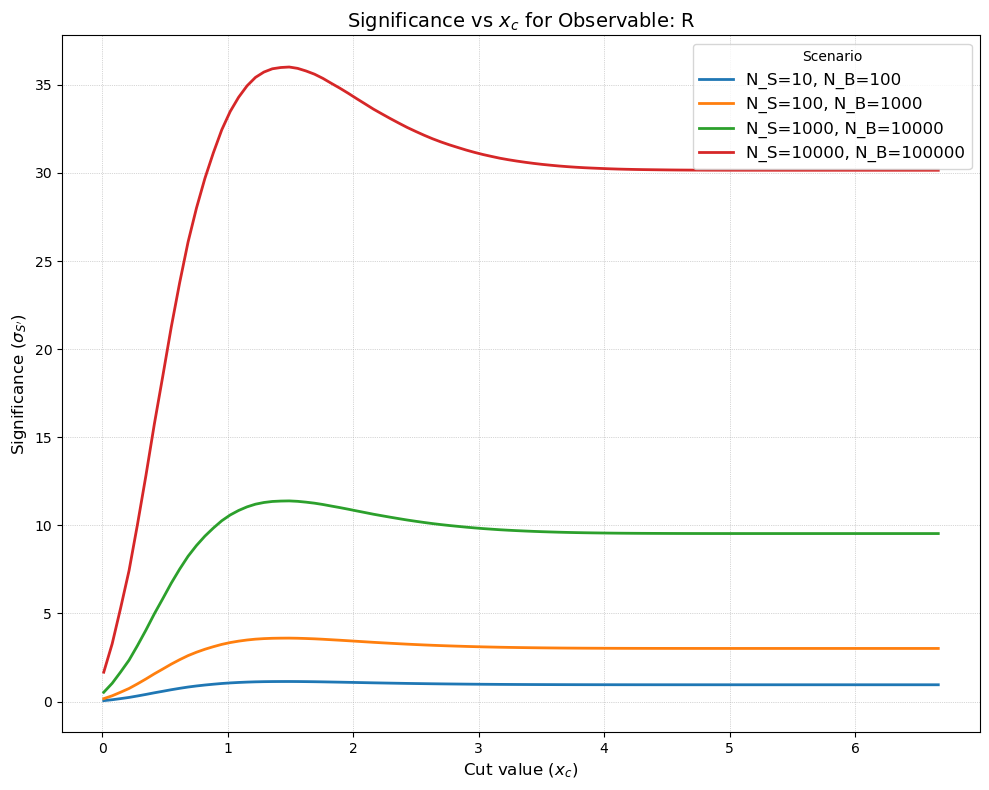

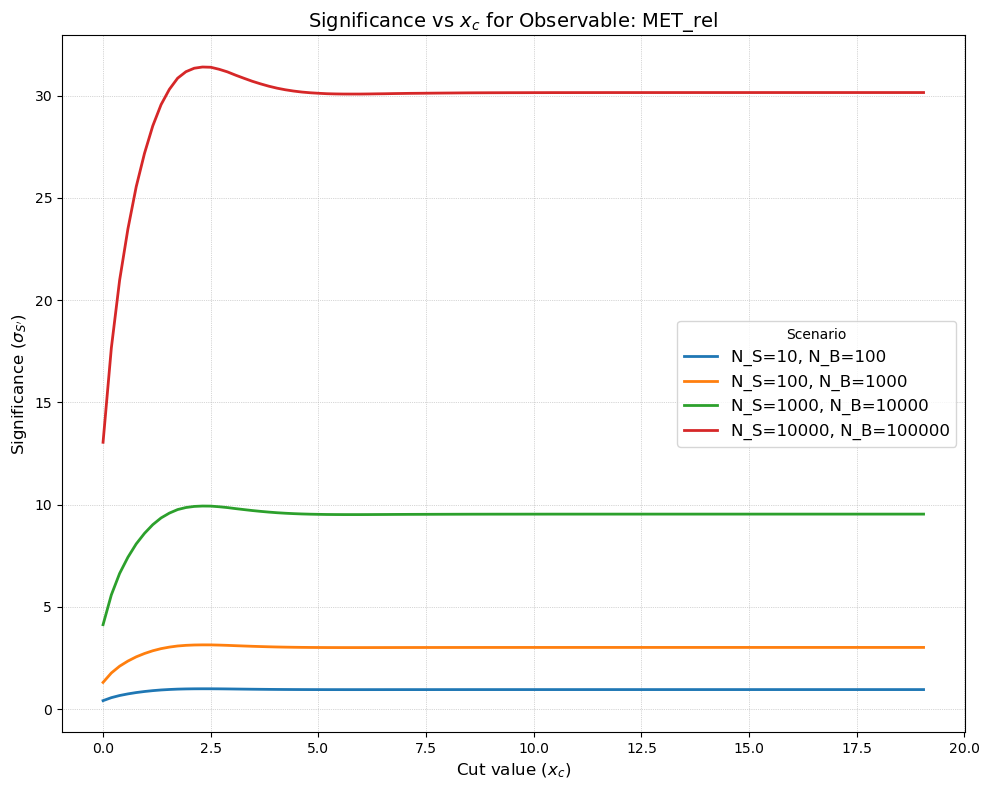

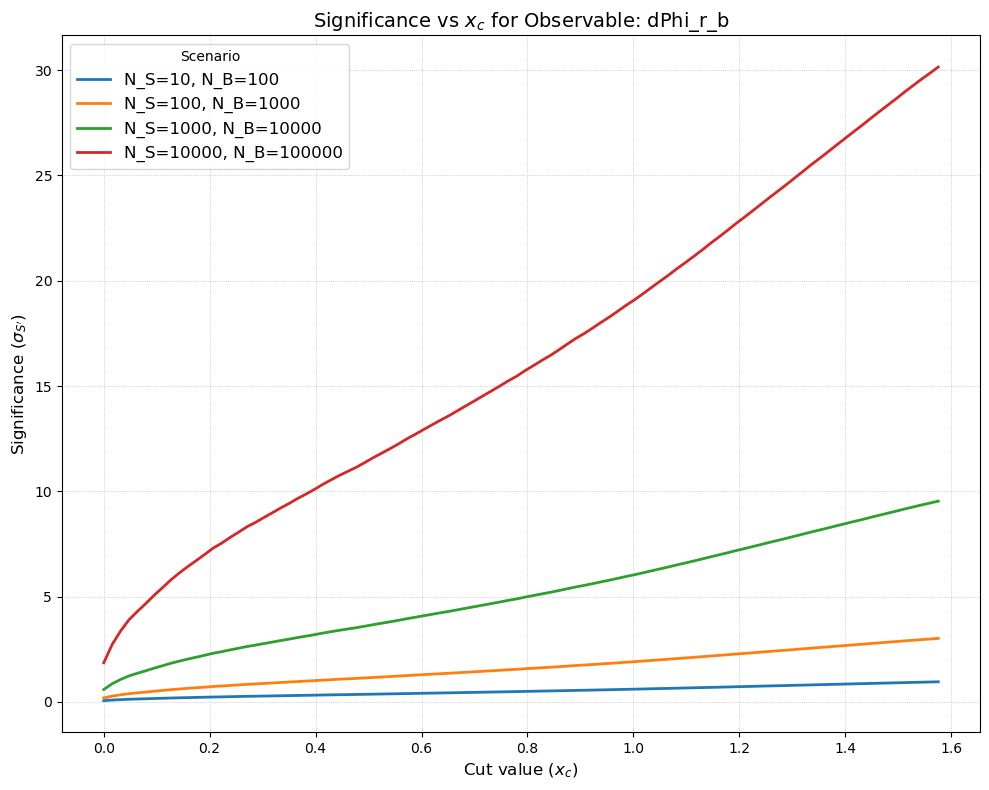

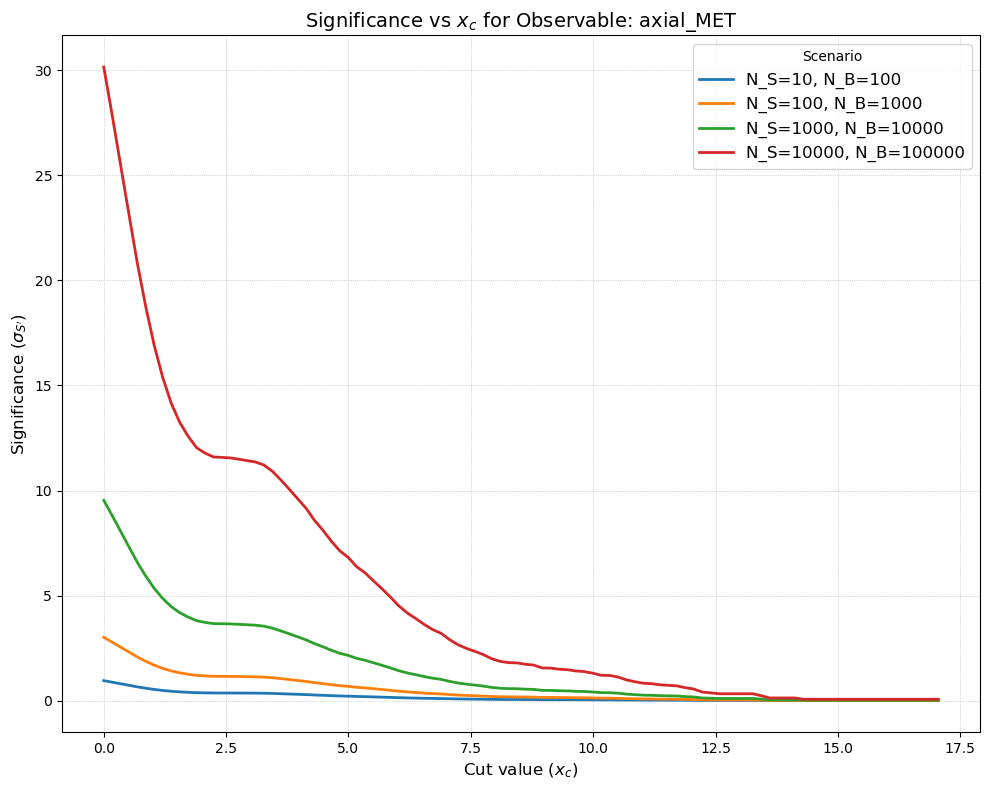

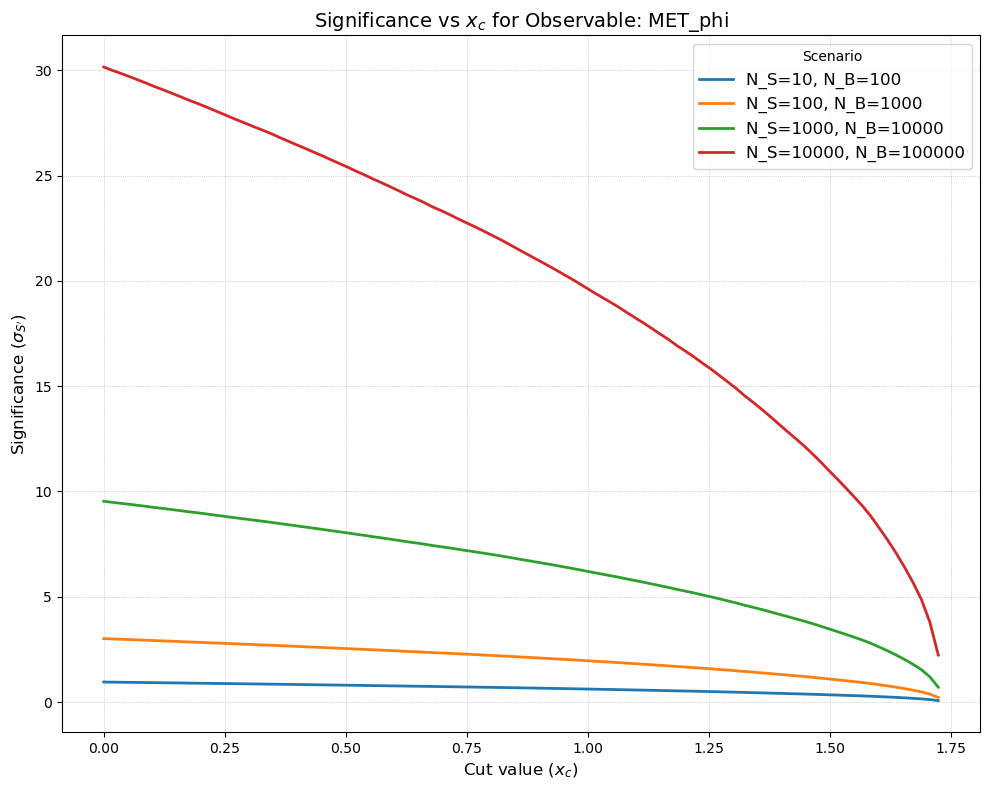

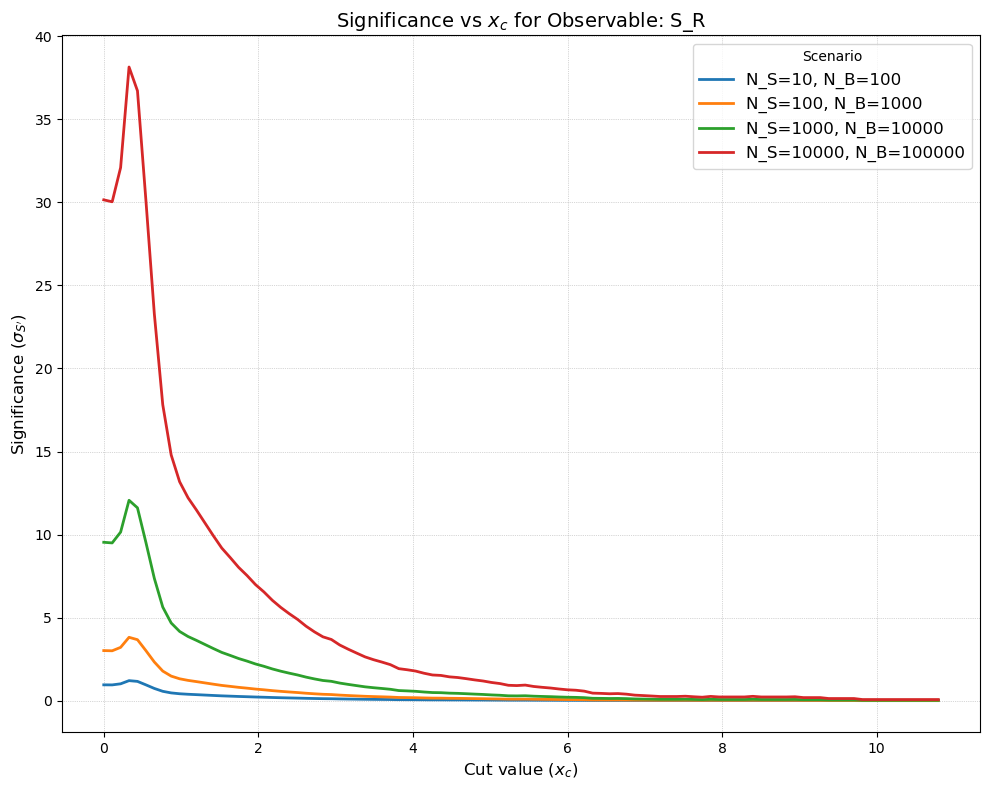

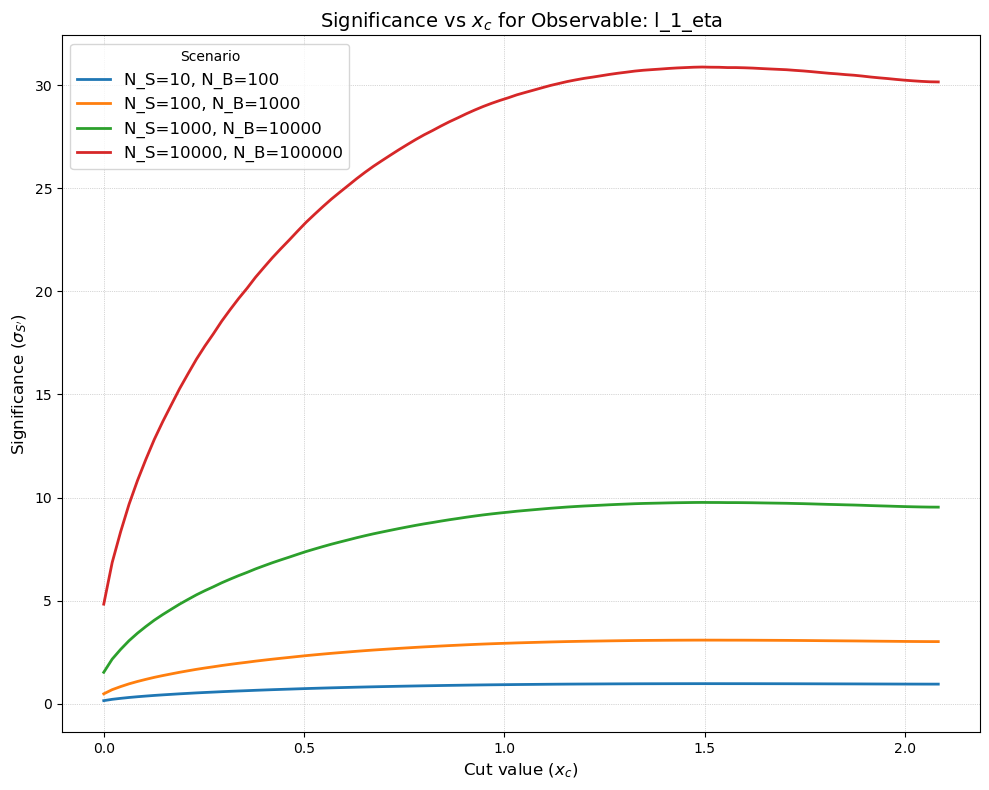

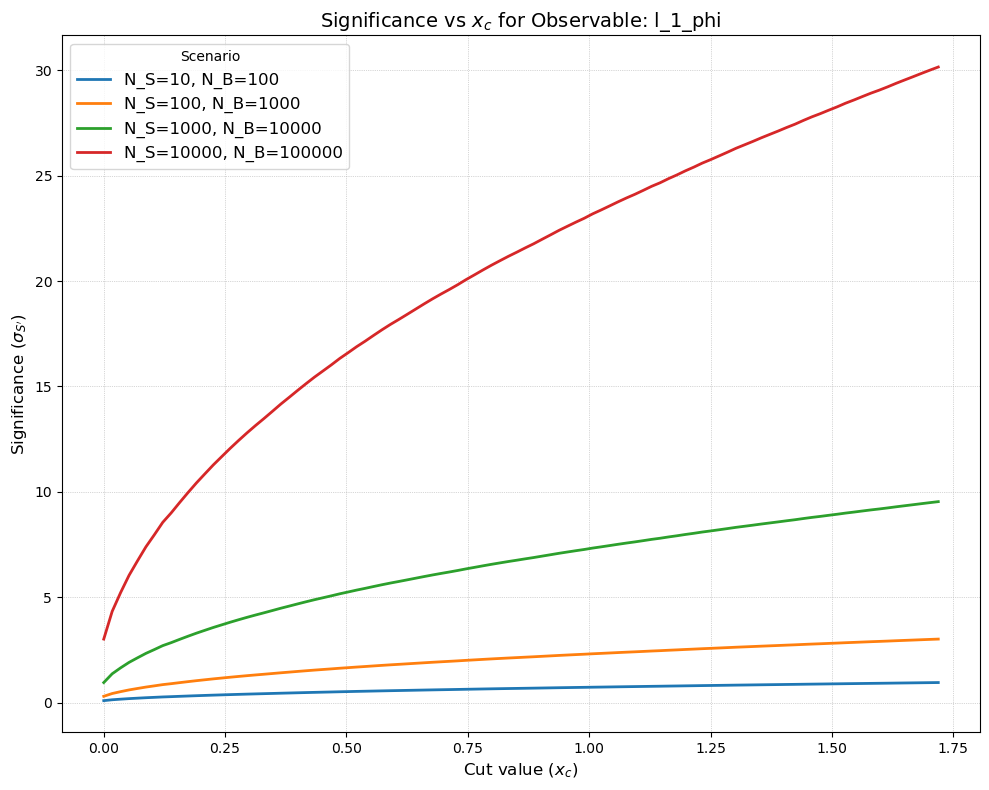

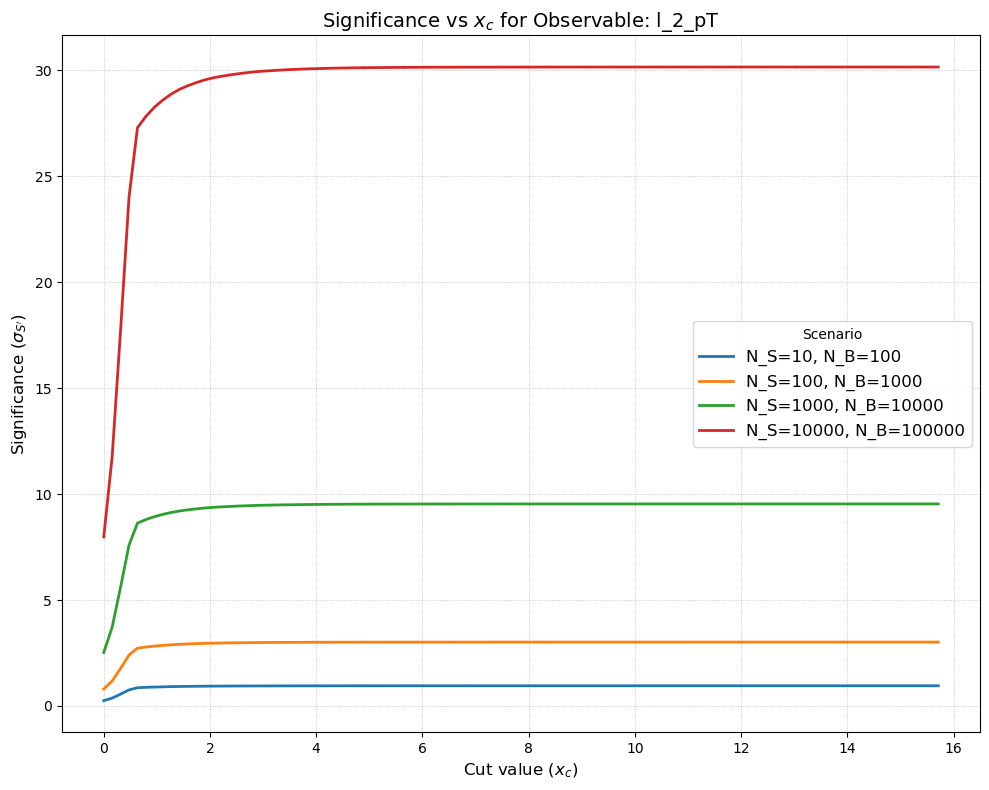

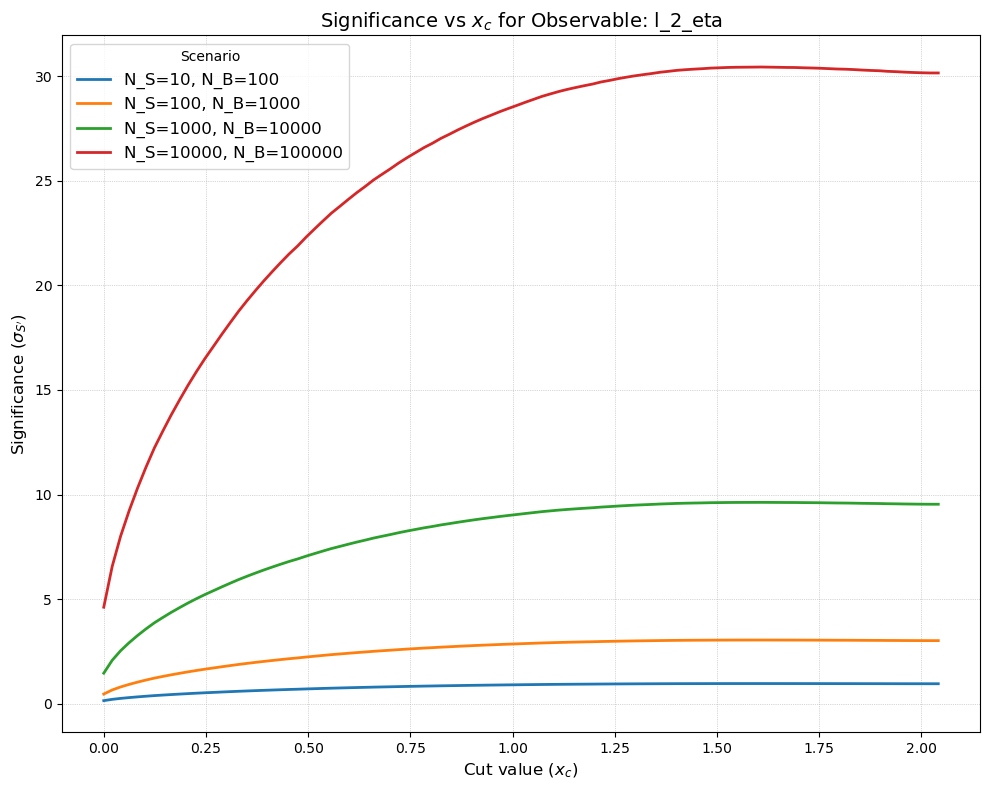

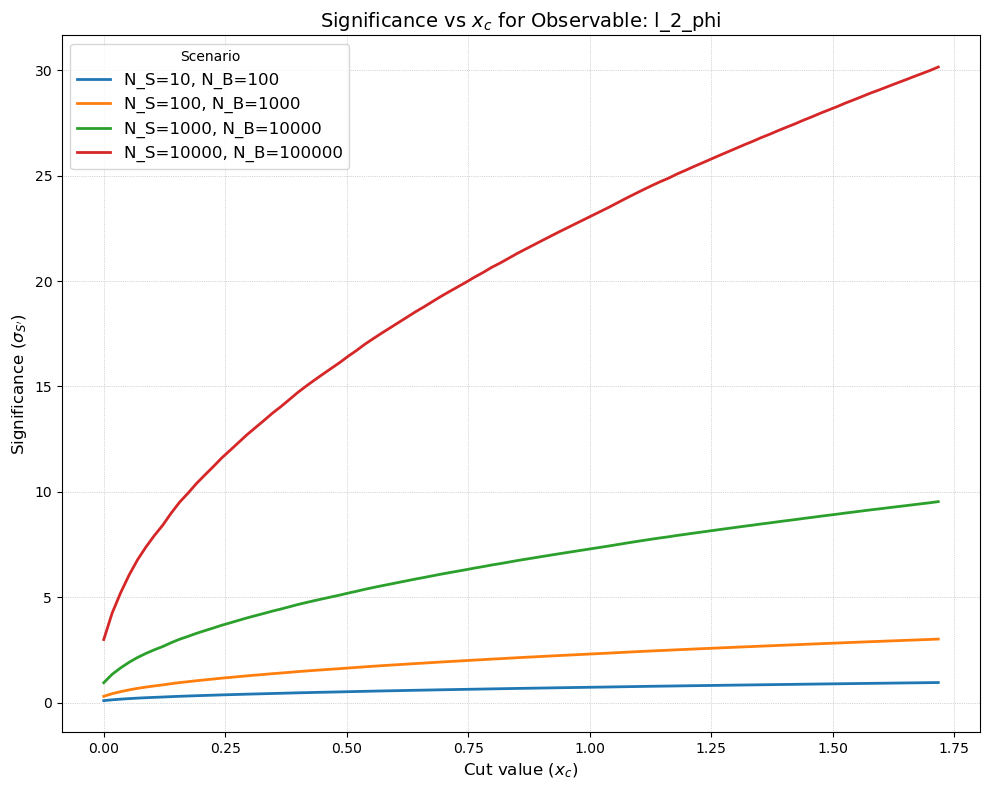

In [105]:
def calculate_significance(signal_data, background_data, N_S, N_B, condition, bins=100):
    
    # Calculate efficiencies and bin edges
    epsilon_S, bin_edges = compute_efficiency(signal_data, condition, bins)
    epsilon_B, _ = compute_efficiency(background_data, condition, bins)
        
    # Apply efficiencies to get N'_S and N'_B
    N_prime_S = epsilon_S * N_S
    N_prime_B = epsilon_B * N_B
        
    # Calculate significance
    sigma_S_prime = N_prime_S / np.sqrt(N_prime_S + N_prime_B)
    
    return sigma_S_prime, bin_edges[:-1]


def plot_significance(signal_df, background_df, observable_name, scenarios, condition, bins=100):
    plt.figure(figsize=(10, 8))

    for N_S, N_B in scenarios:
        sig_data = signal_df[observable_name]
        bkg_data = background_df[observable_name]
        
        significance, x_c_values = calculate_significance(sig_data, bkg_data, N_S, N_B, condition, bins)
        plt.plot(x_c_values, significance, label=f'N_S={N_S}, N_B={N_B}', linewidth=2)

    plt.xlabel('Cut value ($x_c$)', fontsize=12)
    plt.ylabel('Significance ($\\sigma_{S\'}$)', fontsize=12)
    plt.title(f'Significance vs $x_c$ for Observable: {observable_name}', fontsize=14)
    plt.grid(True, which='both', linestyle=':', linewidth=0.5)
    plt.legend(title='Scenario', fontsize=12)
    plt.tight_layout()
    plt.show()
    
scenarios = [
    (10, 100),
    (100, 1000),
    (1000, 10000),
    (10000, 100000)
]


plot_significance(signal, background, 'l_1_pT', scenarios, condition=1)
plot_significance(signal, background, 'M_Delta_R', scenarios, condition=1)
plot_significance(signal, background, 'cos_theta_r1', scenarios, condition=1)
plot_significance(signal, background, 'M_R', scenarios, condition=1)
plot_significance(signal, background, 'M_TR_2', scenarios, condition=1)
plot_significance(signal, background, 'MT2', scenarios, condition=1)
plot_significance(signal, background, 'MET', scenarios, condition=1)

plot_significance(signal, background, 'R', scenarios, condition=2)
plot_significance(signal, background, 'MET_rel', scenarios, condition=2)
plot_significance(signal, background, 'dPhi_r_b', scenarios, condition=2)

plot_significance(signal, background, 'axial_MET', scenarios, condition=3)
plot_significance(signal, background, 'MET_phi', scenarios, condition=3)
plot_significance(signal, background, 'S_R', scenarios, condition=3)

plot_significance(signal, background, 'l_1_eta', scenarios, condition=4)
plot_significance(signal, background, 'l_1_phi', scenarios, condition=4)
plot_significance(signal, background, 'l_2_pT', scenarios, condition=4)
plot_significance(signal, background, 'l_2_eta', scenarios, condition=4)
plot_significance(signal, background, 'l_2_phi', scenarios, condition=4)


## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c). 


In [90]:
selection_criteria = {
    "Scenario 1 (N_S=10, N_B=100)": [
        {"observable": "M_TR_2", "x_c": 1.3, "condition": 1},      
        {"observable": "cos_theta_r1", "x_c": 0.5, "condition": 2},
        {"observable": "MET_rel", "x_c": 1.7, "condition": 1} 
    ],
    "Scenario 2 (N_S=100, N_B=1000)": [
        {"observable": "M_TR_2", "x_c": 1.3, "condition": 1},
        {"observable": "M_Delta_R", "x_c": 2.5, "condition": 1},
        {"observable": "MET_rel", "x_c": 1.7, "condition": 1}
    ],
    "Scenario 3 (N_S=1000, N_B=10000)": [
        {"observable": "R", "x_c": 0.8, "condition": 2},
        {"observable": "axial_MET", "x_c": 90, "condition": 1},
        {"observable": "M_TR_2", "x_c": 1.3, "condition": 1}
    ],
    "Scenario 4 (N_S=10000, N_B=100000)": [
        {"observable": "cos_theta_r1", "x_c": 0.4, "condition": 2},
        {"observable": "MET_rel", "x_c": 1.7, "condition": 1},
        {"observable": "S_R", "x_c": 0.7, "condition": 1}
    ]
}

scenario_names = list(selection_criteria.keys())
print (scenario_names)

['Scenario 1 (N_S=10, N_B=100)', 'Scenario 2 (N_S=100, N_B=1000)', 'Scenario 3 (N_S=1000, N_B=10000)', 'Scenario 4 (N_S=10000, N_B=100000)']


### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

In [52]:
def apply_cut(data, observable, x_c, condition):
    """Apply a cut based on the condition."""
    if condition == 1:
        return data[data[observable] > x_c]
    elif condition == 2:
        return data[data[observable] < x_c]
    elif condition == 3:
        return data[np.abs(data[observable] - data[observable].mean()) > x_c]
    elif condition == 4:
        return data[np.abs(data[observable] - data[observable].mean()) < x_c]
    else:
        raise ValueError("Invalid condition specified.")

import re

def cut_flow_table(signal, background, cuts, scenario_name):
    # Extract N_S and N_B from the scenario name using regex
    match = re.search(r"N_S=(\d+), N_B=(\d+)", scenario_name)
    if match:
        N_S = int(match.group(1))
        N_B = int(match.group(2))
    else:
        raise ValueError(f"Could not extract N_S and N_B from the scenario name: {scenario_name}")


    print(f"\nCut-Flow Table for {scenario_name}")
    print(f"{'Cut':<20}{'ε_S':<10}{'ε_B':<10}{'N\'_S':<10}{'N\'_B':<10}{'σ_S\'':<10}")
    print("-"*60)

    for idx, cut in enumerate(cuts, start=1):
        obs, x_c, cond = cut["observable"], cut["x_c"], cut["condition"]

        sig = apply_cut(signal, obs, x_c, cond)
        bkg = apply_cut(background, obs, x_c, cond)

        # Calculate efficiencies
        eps_s = len(sig) / len(signal)
        eps_b = len(bkg) / len(background)

        # Apply to get N'_S and N'_B
        Np_s = eps_s * N_S
        Np_b = eps_b * N_B

        # Calculate significance
        sigma_s = Np_s / np.sqrt(Np_s + Np_b) if (Np_s + Np_b) > 0 else 0

        # Output results for this cut
        print(f"{obs + ' cut':<20}{eps_s:<10.3f}{eps_b:<10.3f}{Np_s:<10.1f}{Np_b:<10.1f}{sigma_s:<10.4f}")

# Now run this for each scenario
for scenario_name, cuts in selection_criteria.items():
    cut_flow_table(signal, background, cuts, scenario_name)



Cut-Flow Table for Scenario 1 (N_S=10, N_B=100)
Cut                 ε_S       ε_B       N'_S      N'_B      σ_S'      
------------------------------------------------------------
M_TR_2 cut          0.396     0.057     4.0       5.7       1.2708    
cos_theta_r1 cut    0.820     0.947     8.2       94.7      0.8085    
MET_rel cut         0.273     0.065     2.7       6.5       0.9012    

Cut-Flow Table for Scenario 2 (N_S=100, N_B=1000)
Cut                 ε_S       ε_B       N'_S      N'_B      σ_S'      
------------------------------------------------------------
M_TR_2 cut          0.396     0.057     39.6      57.3      4.0188    
M_Delta_R cut       0.042     0.001     4.2       1.1       1.8130    
MET_rel cut         0.273     0.065     27.3      64.5      2.8499    

Cut-Flow Table for Scenario 3 (N_S=1000, N_B=10000)
Cut                 ε_S       ε_B       N'_S      N'_B      σ_S'      
------------------------------------------------------------
R cut               0.335


### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?

In [53]:
observable_1 = [{"observable": "M_TR_2", "x_c": 1.3, "condition": 1},{"observable": "MET_rel", "x_c": 1.7, "condition": 1},{"observable": "M_Delta_R", "x_c": 2.5, "condition": 1}]
_= cut_flow_table(signal, background, observable_1, scenario_names[0])


Cut-Flow Table for Scenario 1 (N_S=10, N_B=100)
Cut                 ε_S       ε_B       N'_S      N'_B      σ_S'      
------------------------------------------------------------
M_TR_2 cut          0.396     0.057     4.0       5.7       1.2708    
MET_rel cut         0.273     0.065     2.7       6.5       0.9012    
M_Delta_R cut       0.042     0.001     0.4       0.1       0.5733    


In [55]:
observable_2 = [{"observable": "M_Delta_R", "x_c": 2.5, "condition": 1},{"observable": "MET_rel", "x_c": 1.7, "condition": 1},{"observable": "M_TR_2", "x_c": 1.3, "condition": 1},]
_= cut_flow_table(signal, background, observable_1, scenario_names[1])


Cut-Flow Table for Scenario 2 (N_S=100, N_B=1000)
Cut                 ε_S       ε_B       N'_S      N'_B      σ_S'      
------------------------------------------------------------
M_Delta_R cut       0.042     0.001     4.2       1.1       1.8130    
MET_rel cut         0.273     0.065     27.3      64.5      2.8499    
M_TR_2 cut          0.396     0.057     39.6      57.3      4.0188    


## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.




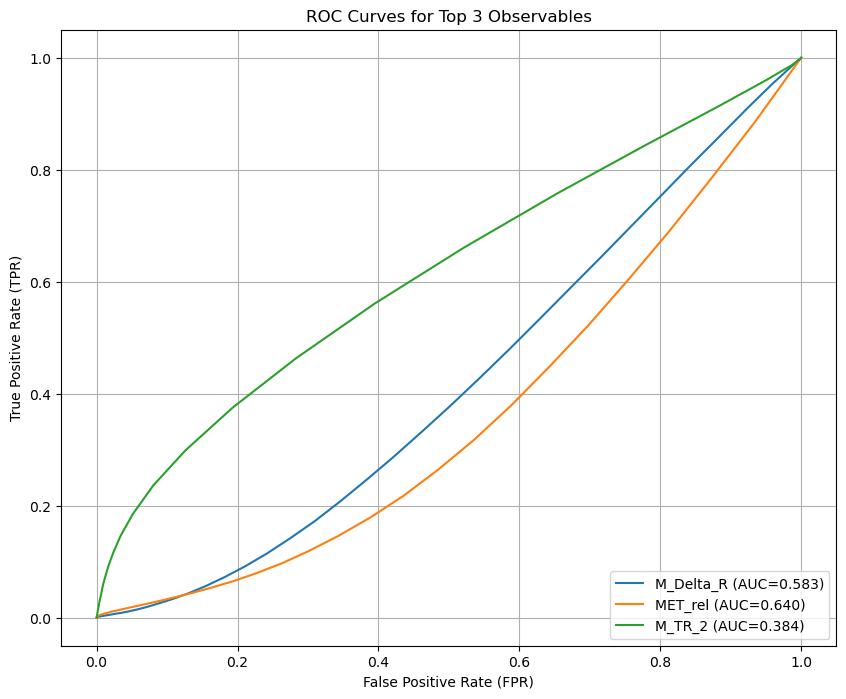

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def AUC(TPR,FPR):
    n = FPR.shape[0]
    return np.sum((FPR[0:n-1]-FPR[1:]) * (TPR[0:n-1]+TPR[1:])/2)


# List of top observables
top_observables = ['M_Delta_R', 'MET_rel', 'M_TR_2']

plt.figure(figsize=(10, 8))

for observable in top_observables:
    TPR,bins_sig = compute_efficiency(df_sig[observable],1)
    FPR,bins_sig = compute_efficiency(df_bkg[observable],1)

    auc= AUC(FPR, TPR)

    plt.plot(FPR, TPR, label=f"{observable} (AUC={auc:.3f})")

# Labeling
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curves for Top 3 Observables")
plt.legend(loc="lower right")
plt.grid()
plt.show()
    


### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.


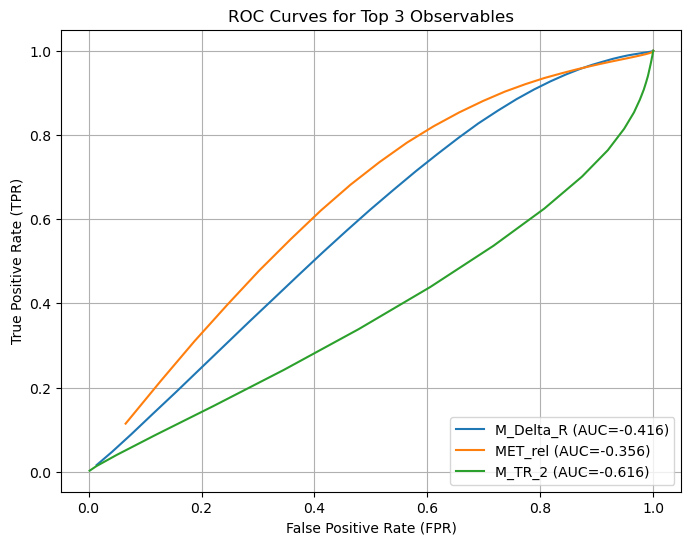

In [76]:
def roc_curve_observables(df_sig, df_bkg, top_observables,condition,bins=100,log=False):
    
    plt.figure(figsize=(8,6))
    for observable in top_observables:
        
        TPR,bins_sig = compute_efficiency(df_sig[observable],condition)
        FPR,bins_sig = compute_efficiency(df_bkg[observable],condition,)

        auc= AUC(FPR, TPR)

        plt.plot(FPR, TPR, label=f"{observable} (AUC={auc:.3f})")

    # Labeling
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("ROC Curves for Top 3 Observables")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()
    
roc_curve_observables(df_sig,df_bkg,top_observables, 2)


### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.

Plotting ROC for Scenario 1 (N_S=10, N_B=100)


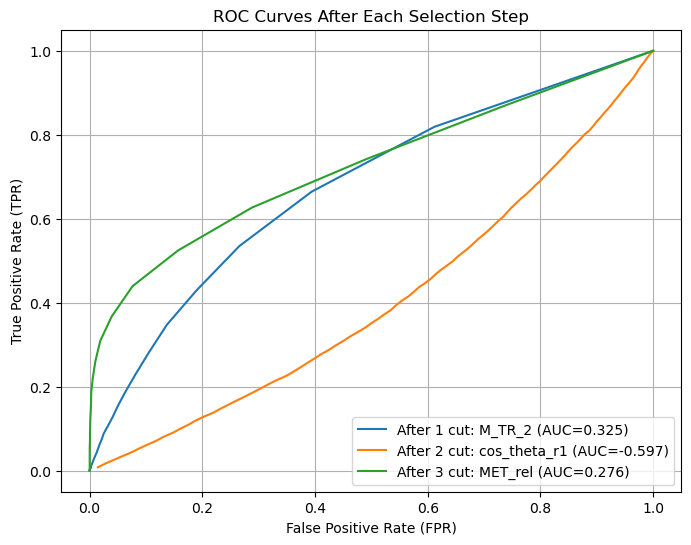

Plotting ROC for Scenario 2 (N_S=100, N_B=1000)


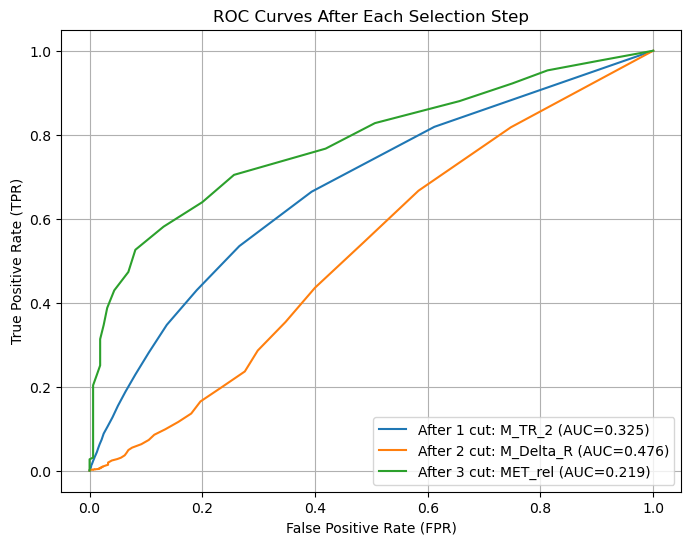

Plotting ROC for Scenario 3 (N_S=1000, N_B=10000)


/usr/lib/python3/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


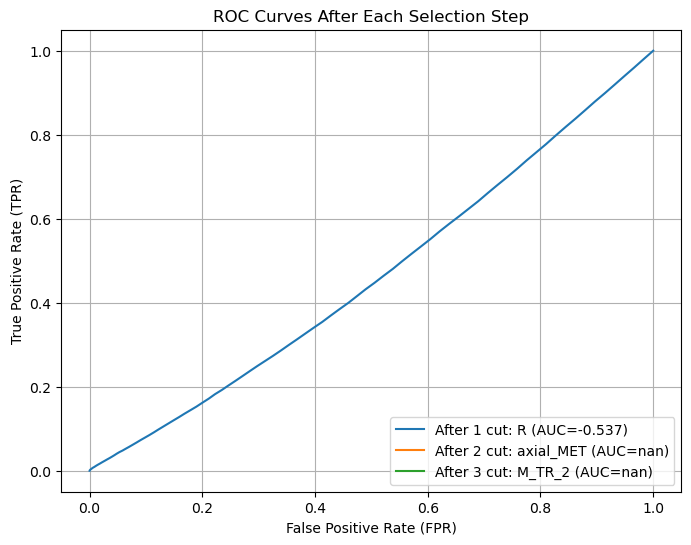

Plotting ROC for Scenario 4 (N_S=10000, N_B=100000)


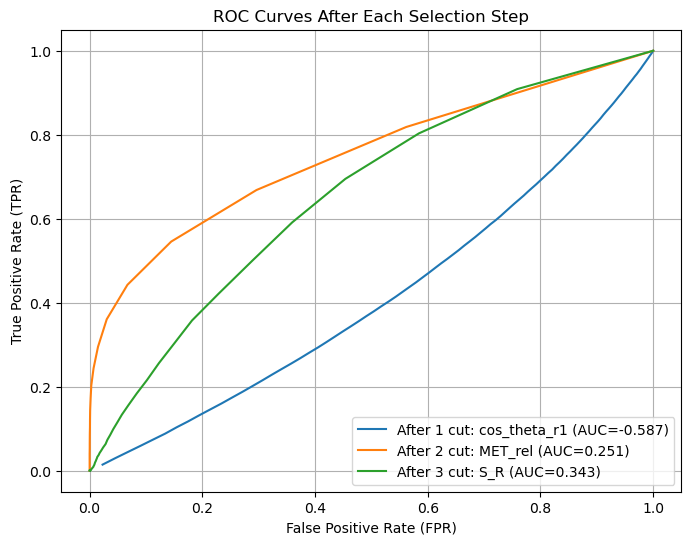

In [77]:
def roc_curve_for_selections(df_sig, df_bkg, selection_list, bins=100):
    plt.figure(figsize=(8, 6))

    df_sig_cut = df_sig.copy()
    df_bkg_cut = df_bkg.copy()

    for i, selection_step in enumerate(selection_list):
        feature = selection_step["observable"]
        x_c = selection_step["x_c"]
        condition = selection_step["condition"]

        # Apply the cut to both signal and background
        df_sig_cut = apply_cut(df_sig_cut, feature, x_c, condition)
        df_bkg_cut = apply_cut(df_bkg_cut, feature, x_c, condition)

        TPR, bins_sig = compute_efficiency(df_sig_cut[feature], condition, bins=bins)
        FPR, _ = compute_efficiency(df_bkg_cut[feature], condition, bins=bins_sig)
        auc = AUC(FPR, TPR)

        label = f"After {i+1} cut: {feature} (AUC={auc:.3f})"
        plt.plot(FPR, TPR, label=label)

    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("ROC Curves After Each Selection Step")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()
    
for scenario_name in scenario_names:
    print(f"Plotting ROC for {scenario_name}")
    scenario = selection_criteria[scenario_name]
    roc_curve_for_selections(df_sig, df_bkg, scenario)



## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.


In [78]:
X_sig = df_sig[FeatureNames].values
X_bkg = df_bkg[FeatureNames].values

# Means
m1 = np.mean(X_sig, axis=0)  # signal
m2 = np.mean(X_bkg, axis=0)  # background

m1_col = m1.reshape(-1, 1)
m2_col = m2.reshape(-1, 1)

# Between-class covariance matrix
S_B = (m2_col - m1_col) @ (m2_col - m1_col).T 

# Within-class covariance matrix
S_W = np.zeros((len(FeatureNames), len(FeatureNames)))

# Signal contribution
for x in X_sig:
    x_col = x.reshape(-1, 1)  # make it a column vector
    S_W += (x_col - m1_col) @ (x_col - m1_col).T

# Background contribution
for x in X_bkg:
    x_col = x.reshape(-1, 1)
    S_W += (x_col - m2_col) @ (x_col - m2_col).T

    
print("S_B (Between-class scatter):\n", S_B)
print("\nS_W (Within-class scatter):\n", S_W)


S_B (Between-class scatter):
 [[0.11544542 0.00975429 0.16877407 0.11657548 0.0541136  0.17167305
  0.04671619 0.11032321 0.03585474 0.03502823]
 [0.00975429 0.00082417 0.01426017 0.00984977 0.0045722  0.01450511
  0.00394717 0.0093215  0.00302946 0.00295963]
 [0.16877407 0.01426017 0.24673725 0.17042614 0.07911074 0.25097538
  0.06829617 0.16128571 0.05241741 0.05120911]
 [0.11657548 0.00984977 0.17042614 0.1177166  0.05464331 0.17335351
  0.04717348 0.11140313 0.03620571 0.03537111]
 [0.0541136  0.0045722  0.07911074 0.05464331 0.02536508 0.08046961
  0.02189763 0.05171263 0.01680646 0.01641905]
 [0.17167305 0.01450511 0.25097538 0.17335351 0.08046961 0.25528632
  0.06946928 0.16405607 0.05331777 0.05208871]
 [0.04671619 0.00394717 0.06829617 0.04717348 0.02189763 0.06946928
  0.01890419 0.04464343 0.01450899 0.01417454]
 [0.11032321 0.0093215  0.16128571 0.11140313 0.05171263 0.16405607
  0.04464343 0.10542826 0.0342639  0.03347406]
 [0.03585474 0.00302946 0.05241741 0.03620571 0.01

### Exercise 8.2

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories. 

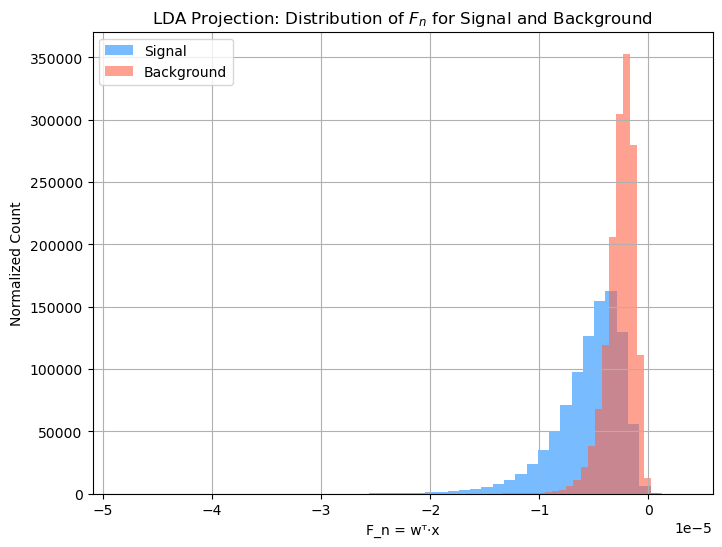

In [79]:
# Compute w = S_W^{-1} * (m2 - m1)
w = np.linalg.inv(S_W) @ (m2_col - m1_col)   # shape (n_features, 1)
w_flat = w.flatten()  # shape (n_features,)


F_sig = X_sig @ w_flat  # shape (N_sig,)
F_bkg = X_bkg @ w_flat  # shape (N_bkg,)


plt.figure(figsize=(8, 6))

plt.hist(F_sig, bins=50, alpha=0.6, label="Signal", color="dodgerblue", density=True)
plt.hist(F_bkg, bins=50, alpha=0.6, label="Background", color="tomato", density=True)

plt.xlabel("F_n = wᵀ·x")
plt.ylabel("Normalized Count")
plt.title("LDA Projection: Distribution of $F_n$ for Signal and Background")
plt.legend()
plt.grid(True)
plt.show()

### Exercise 8.3

Draw the ROC curve for $F_n$. 

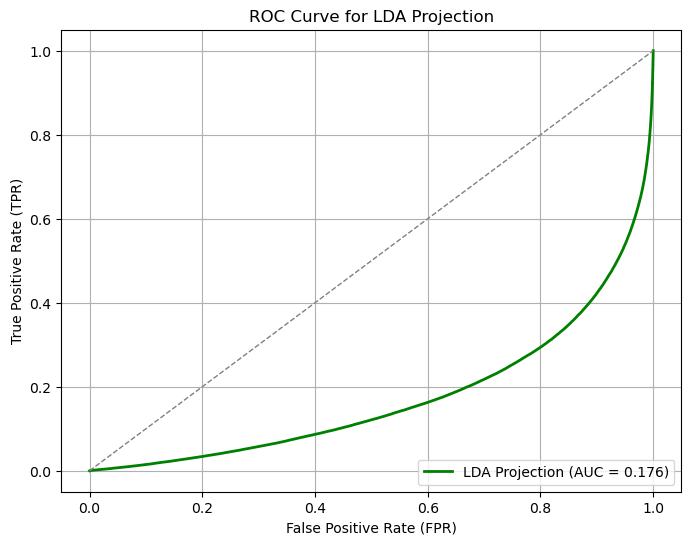

In [82]:
from sklearn.metrics import roc_curve, auc

def roc_curve_with_LDA(F_sig, F_bkg):
    F_all = np.concatenate([F_sig, F_bkg])
    labels = np.concatenate([np.ones_like(F_sig), np.zeros_like(F_bkg)])

    fpr, tpr, _ = roc_curve(labels, F_all)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="green", lw=2, label=f"LDA Projection (AUC = {roc_auc:.3f})")
    plt.plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--")

    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("ROC Curve for LDA Projection")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()
    
roc_curve_with_LDA(F_sig, F_bkg)


### Exercise 8.4

What is the maximal significance you can obtain in the scenarios in exercise 5?

In [ ]:
significance =plot_significance(signal, background, 'M_TR_2', scenarios, condition=1)
max_significance = np.max(significance)
best_cut = x_c[np.argmax(significance)]
print(f"Max significance: {max_significance:.3f} at x_c = {best_cut:.3f}")